# Netflix Data Analysis Using Python
In this project, we will explore and analyze the 'Netflix Movies and TV Shows dataset' using Python, Numpy, Pandas, and Matplotlib.  
The goal is to clean, understand, and visualize insights about Netflix's catalog - including content types, release years, genres, and age certifications.

# Imports FrameWorks and Module

In [1571]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import re
from collections import Counter

# Reading and Cleaning Netflix Dataset

In [1572]:
filepath = f"datasets/netflix_titles.csv"
netflix_df = pd.read_csv(filepath)

# List first five row of dataframe

In [1573]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,popularity,votes,pop,score
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,82.70,35660,0.656327,0.679087
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,95.55,4439,0.866122,0.555187
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",72.40,33172,0.488163,0.558285
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,58.55,36622,0.262041,0.450212
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,86.60,12577,0.720000,0.532620


# List total number of rows and columns in dataframe

In [1574]:
df_shape = netflix_df.shape
print(f"Total no. of Rows and Columns in DataFrame : Rows - {df_shape[0]}, Columns - {df_shape[1]}")


Total no. of Rows and Columns in DataFrame : Rows - 6234, Columns - 16


#Retrive the information of Dataset

In [1575]:
netflix_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6234 non-null   int64  
 1   type          6234 non-null   object 
 2   title         6234 non-null   object 
 3   director      4265 non-null   object 
 4   cast          5664 non-null   object 
 5   country       5758 non-null   object 
 6   date_added    6223 non-null   object 
 7   release_year  6234 non-null   int64  
 8   rating        6224 non-null   object 
 9   duration      6234 non-null   object 
 10  genre         6234 non-null   object 
 11  description   6234 non-null   object 
 12  popularity    6234 non-null   float64
 13  votes         6234 non-null   int64  
 14  pop           6234 non-null   float64
 15  score         6234 non-null   float64
dtypes: float64(3), int64(3), object(10)
memory usage: 779.4+ KB


# Drop records if specific columns have null value

In [1576]:
columns_lst = ['show_id', 'country', 'date_added', 'release_year', 'genre']
netflix_df.dropna(subset=columns_lst, how = 'any', inplace=True)
print(f'Modified shape of Dataset: {netflix_df.shape}')


Modified shape of Dataset: (5749, 16)


#Retrive the number of duplicate records

In [1577]:
count_duplicate = netflix_df.duplicated().sum()
print(f"Number of Duplicate records : {count_duplicate}")

Number of Duplicate records : 0


# Remove whitespace and convert the date_added columns datatype from object to datetime

In [1578]:
def stripSpace(date):
    if isinstance(date, str):
        date = date.strip()
        return date
    return date
        
netflix_df['date_added'] = netflix_df['date_added'].apply(lambda x: stripSpace(x))

netflix_df['date_added'] =  pd.to_datetime(netflix_df['date_added'], format = '%B %d, %Y')


# Visualisation of Dataset
Bar chart representing a content type (Movie vs TV Show) on Netflix

In [1579]:
def plotbarchart(ax, x_coordinate:list, y_coordinate:list, title:str, x_label:str, y_label:str):
    bars = ax.bar(x_coordinate, y_coordinate, color='#AEC6CF', width = 0.4, edgecolor = 'black')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.bar_label(bars)
    ax.spines[["top", "right"]].set_visible(False)


In [1580]:

def plotpieChart(ax, value:list=None, pie_title:str=None, legend:list="", legendfontSize:int=10):
    ax.pie(value, autopct=lambda pct : f"{pct:.2f}%", colors=plt.cm.Paired.colors)
    ax.set_title(pie_title)
    ax.legend(legend, fontsize=legendfontSize, loc="upper right")

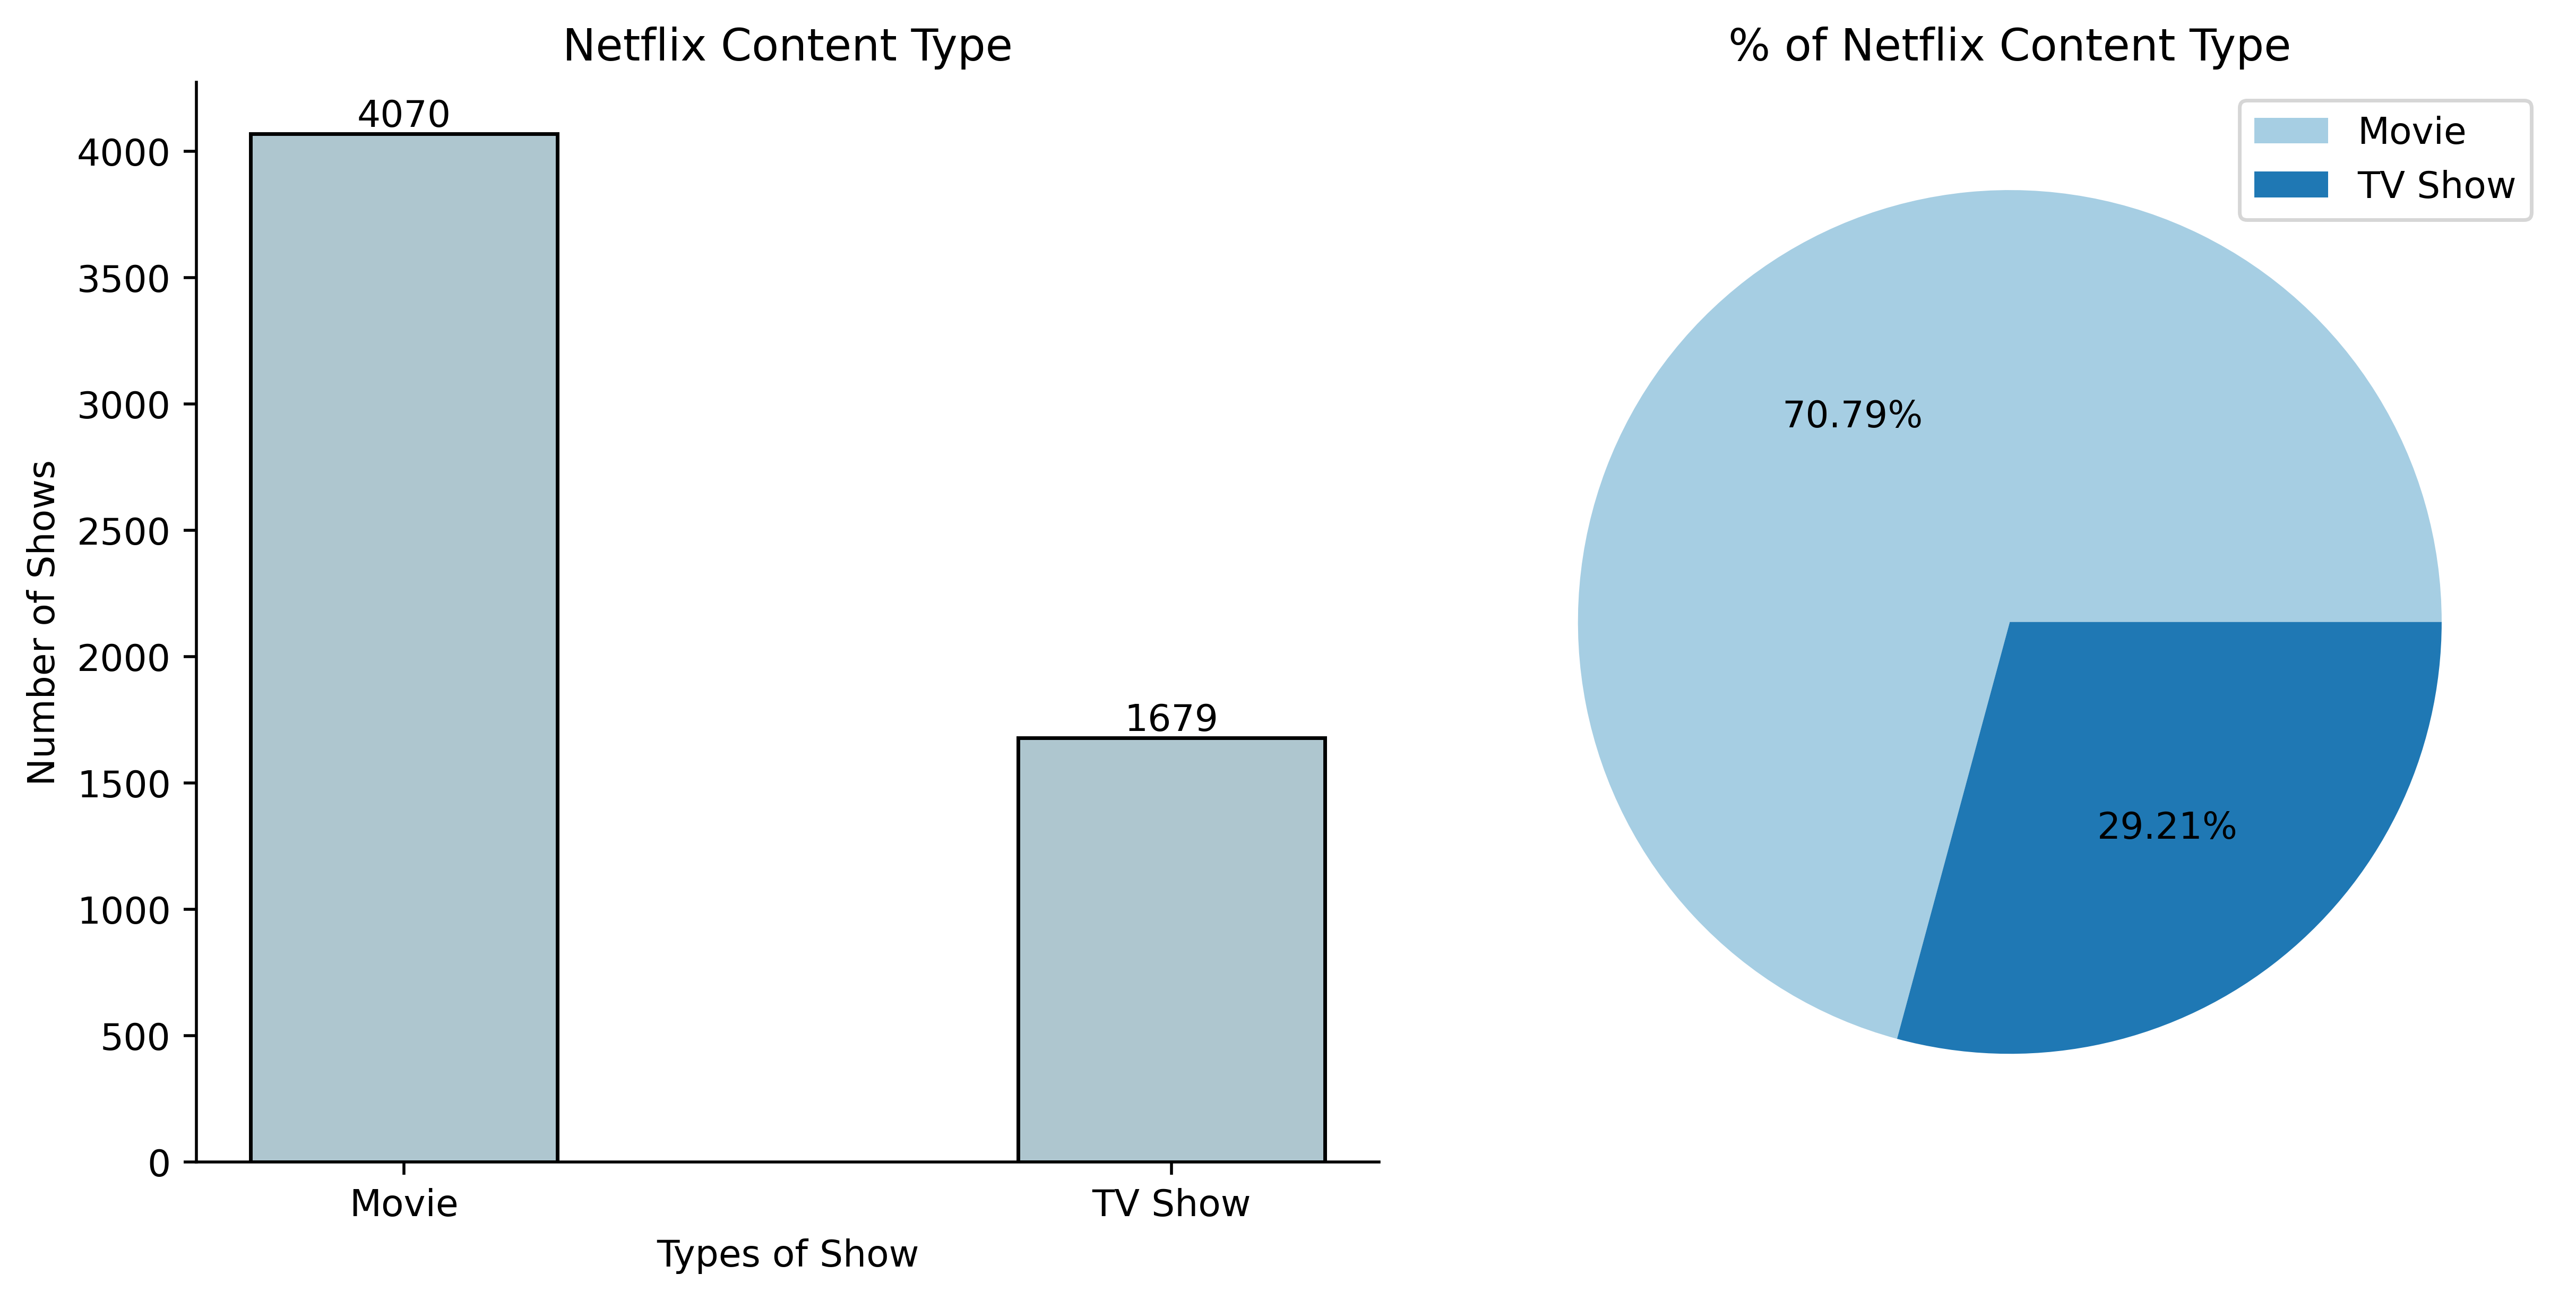

In [1581]:
type_counts = netflix_df['type'].value_counts()
movie_type = type_counts.index
movie_type_counts = type_counts.to_list()
title = "Netflix Content Type"
x_label = "Types of Show"
y_label = "Number of Shows"


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10.0, 5.0), dpi = 500)
plotbarchart(ax[0], movie_type, movie_type_counts, title, x_label, y_label)

pie_title = "% of Netflix Content Type"
plotpieChart(ax[1], movie_type_counts, pie_title, legend=movie_type)

plt.tight_layout()
plt.show()


Summary - Netflix Content Analysis

Based on the analysis of the dataset, Netflix releases two main types of shows - Movies and TV Shows.
Out of the total content available:
-> Movies: 4,070 titles
-> TV Shows: 1,679 titles

-> This indicates that movies make up the majority of Netflix’s catalog, accounting for roughly 70.79% of all content, while TV shows represent about 29.21%.

The data suggests that Netflix focuses more on offering a wide variety of movies, although its collection of TV shows is also significant and continues to grow with time.

# Calculate and Visualize distribution of release years 

In [1582]:
def plothistogram(ax, x, bins, color, edge, title, xlabel, ylabel, log:bool=False):
    ax.hist(x, bins=bins, color=color, edgecolor=edge, log=log)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

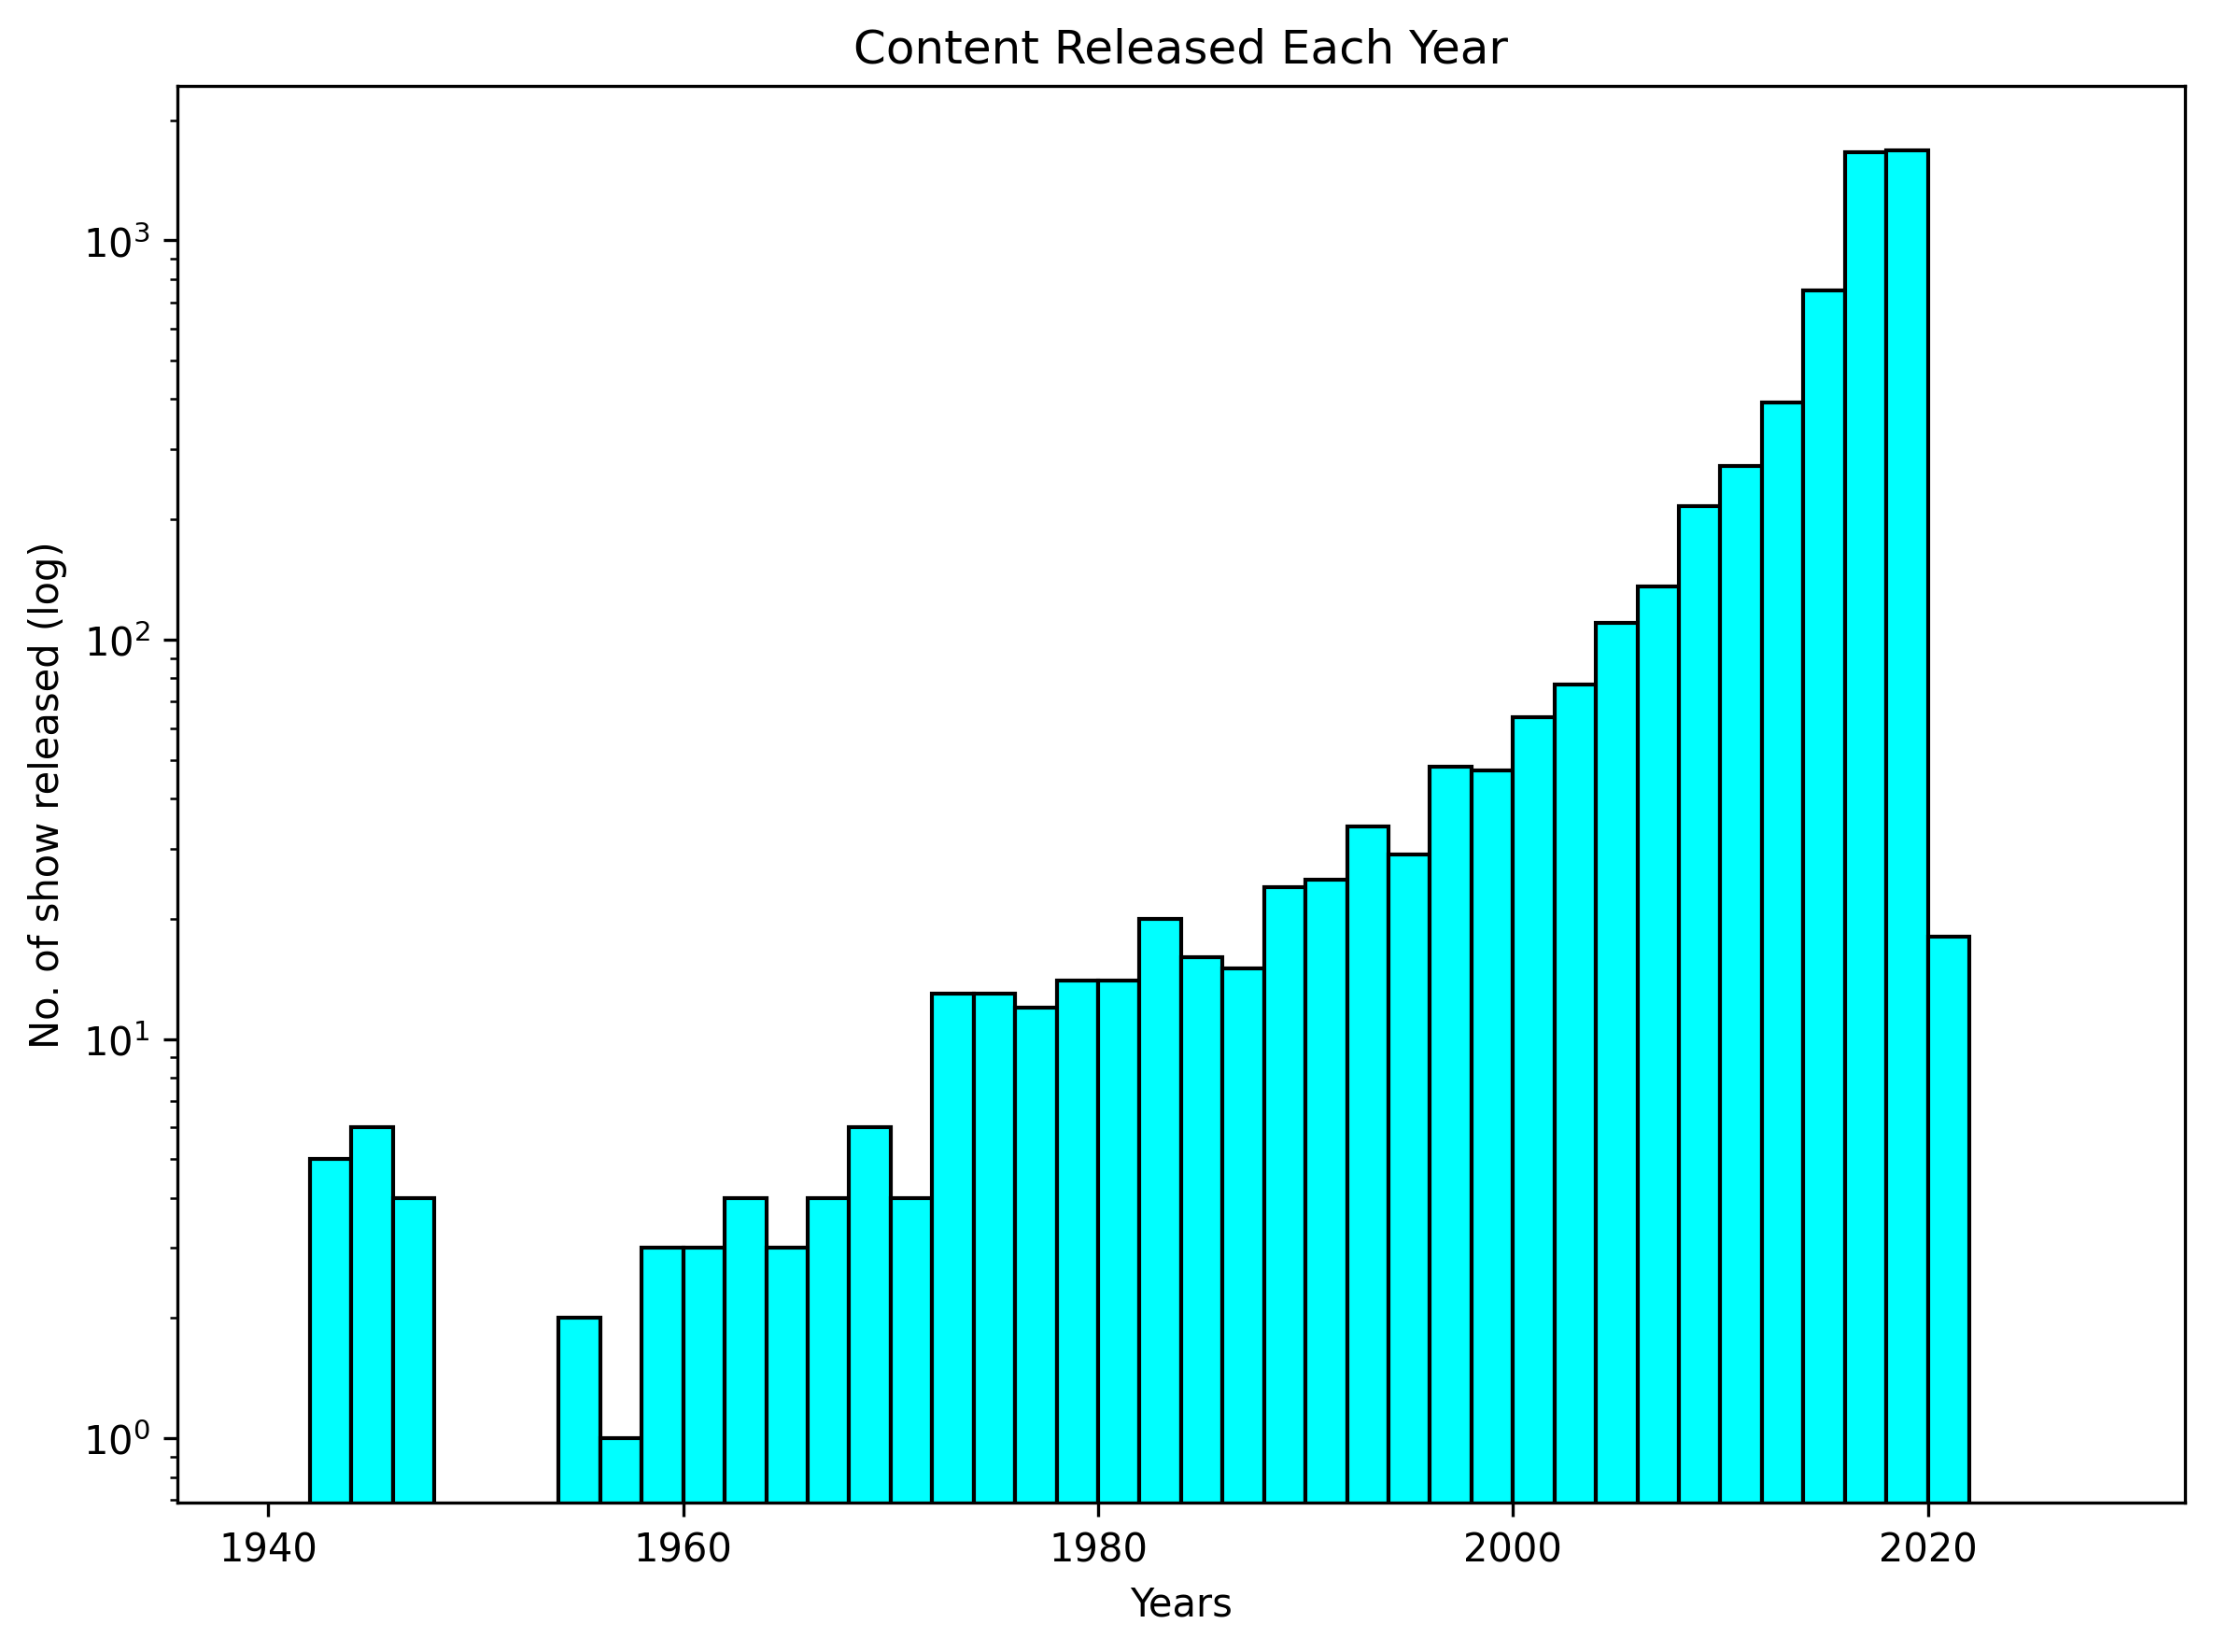

In [1583]:
release_year = netflix_df['release_year']
bins = [year for year in range(1940, 2030, 2)]
title = "Content Released Each Year"
xlabel, ylabel = ("Years", "No. of show released (log)")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6), dpi = 300)
plothistogram(ax, netflix_df['release_year'], bins=bins, color='aqua', edge="black", title=title, xlabel=xlabel, ylabel=ylabel, log=True)
plt.tight_layout()

Summary - Content Released Each Year 

--> Histogram representing the content released each year with 2-year bins.

-> Netflix’s library has grown a lot over time.
-> Very few shows and movies were released before 1980.
-> From the 2000s onwards, the number of releases started rising quickly.

The biggest jump happened after 2015, showing Netflix’s major global expansion and focus on producing more content.

# Country Produces the most Netflix titles

In [1584]:
country = []
def country_data(row):
    global country
    for val in row:
        if len(val)==0:
            continue 
        else: 
            val = val.strip()
            country.append(val)

country_list = netflix_df['country'].apply(lambda x : x.split(',')).tolist()

for row in country_list:
    country_data(row)

print(f'Top 10 Country Produces the Most Netflix Titles :\n')
country_count = Counter(country).most_common(10)
for country, count in country_count:
    print(f'{country} - {count}')

Top 10 Country Produces the Most Netflix Titles :

United States - 2604
India - 838
United Kingdom - 601
Canada - 318
France - 271
Japan - 230
Spain - 178
South Korea - 162
Germany - 151
Mexico - 129


In [1585]:
def plothorizontalbar(ax, x:list=None, y:list=None, color:str='blue', title:str=None, xlabel:str=None, ylabel:str=None, label_fontsize:int=5):
    bars = ax.barh(y = x, width = y, color=color, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.invert_yaxis()
    ax.bar_label(bars, label_type='center', fontsize = label_fontsize)
    bars[0].set_color('#2ecc71')
    bars[0].set_edgecolor('black')


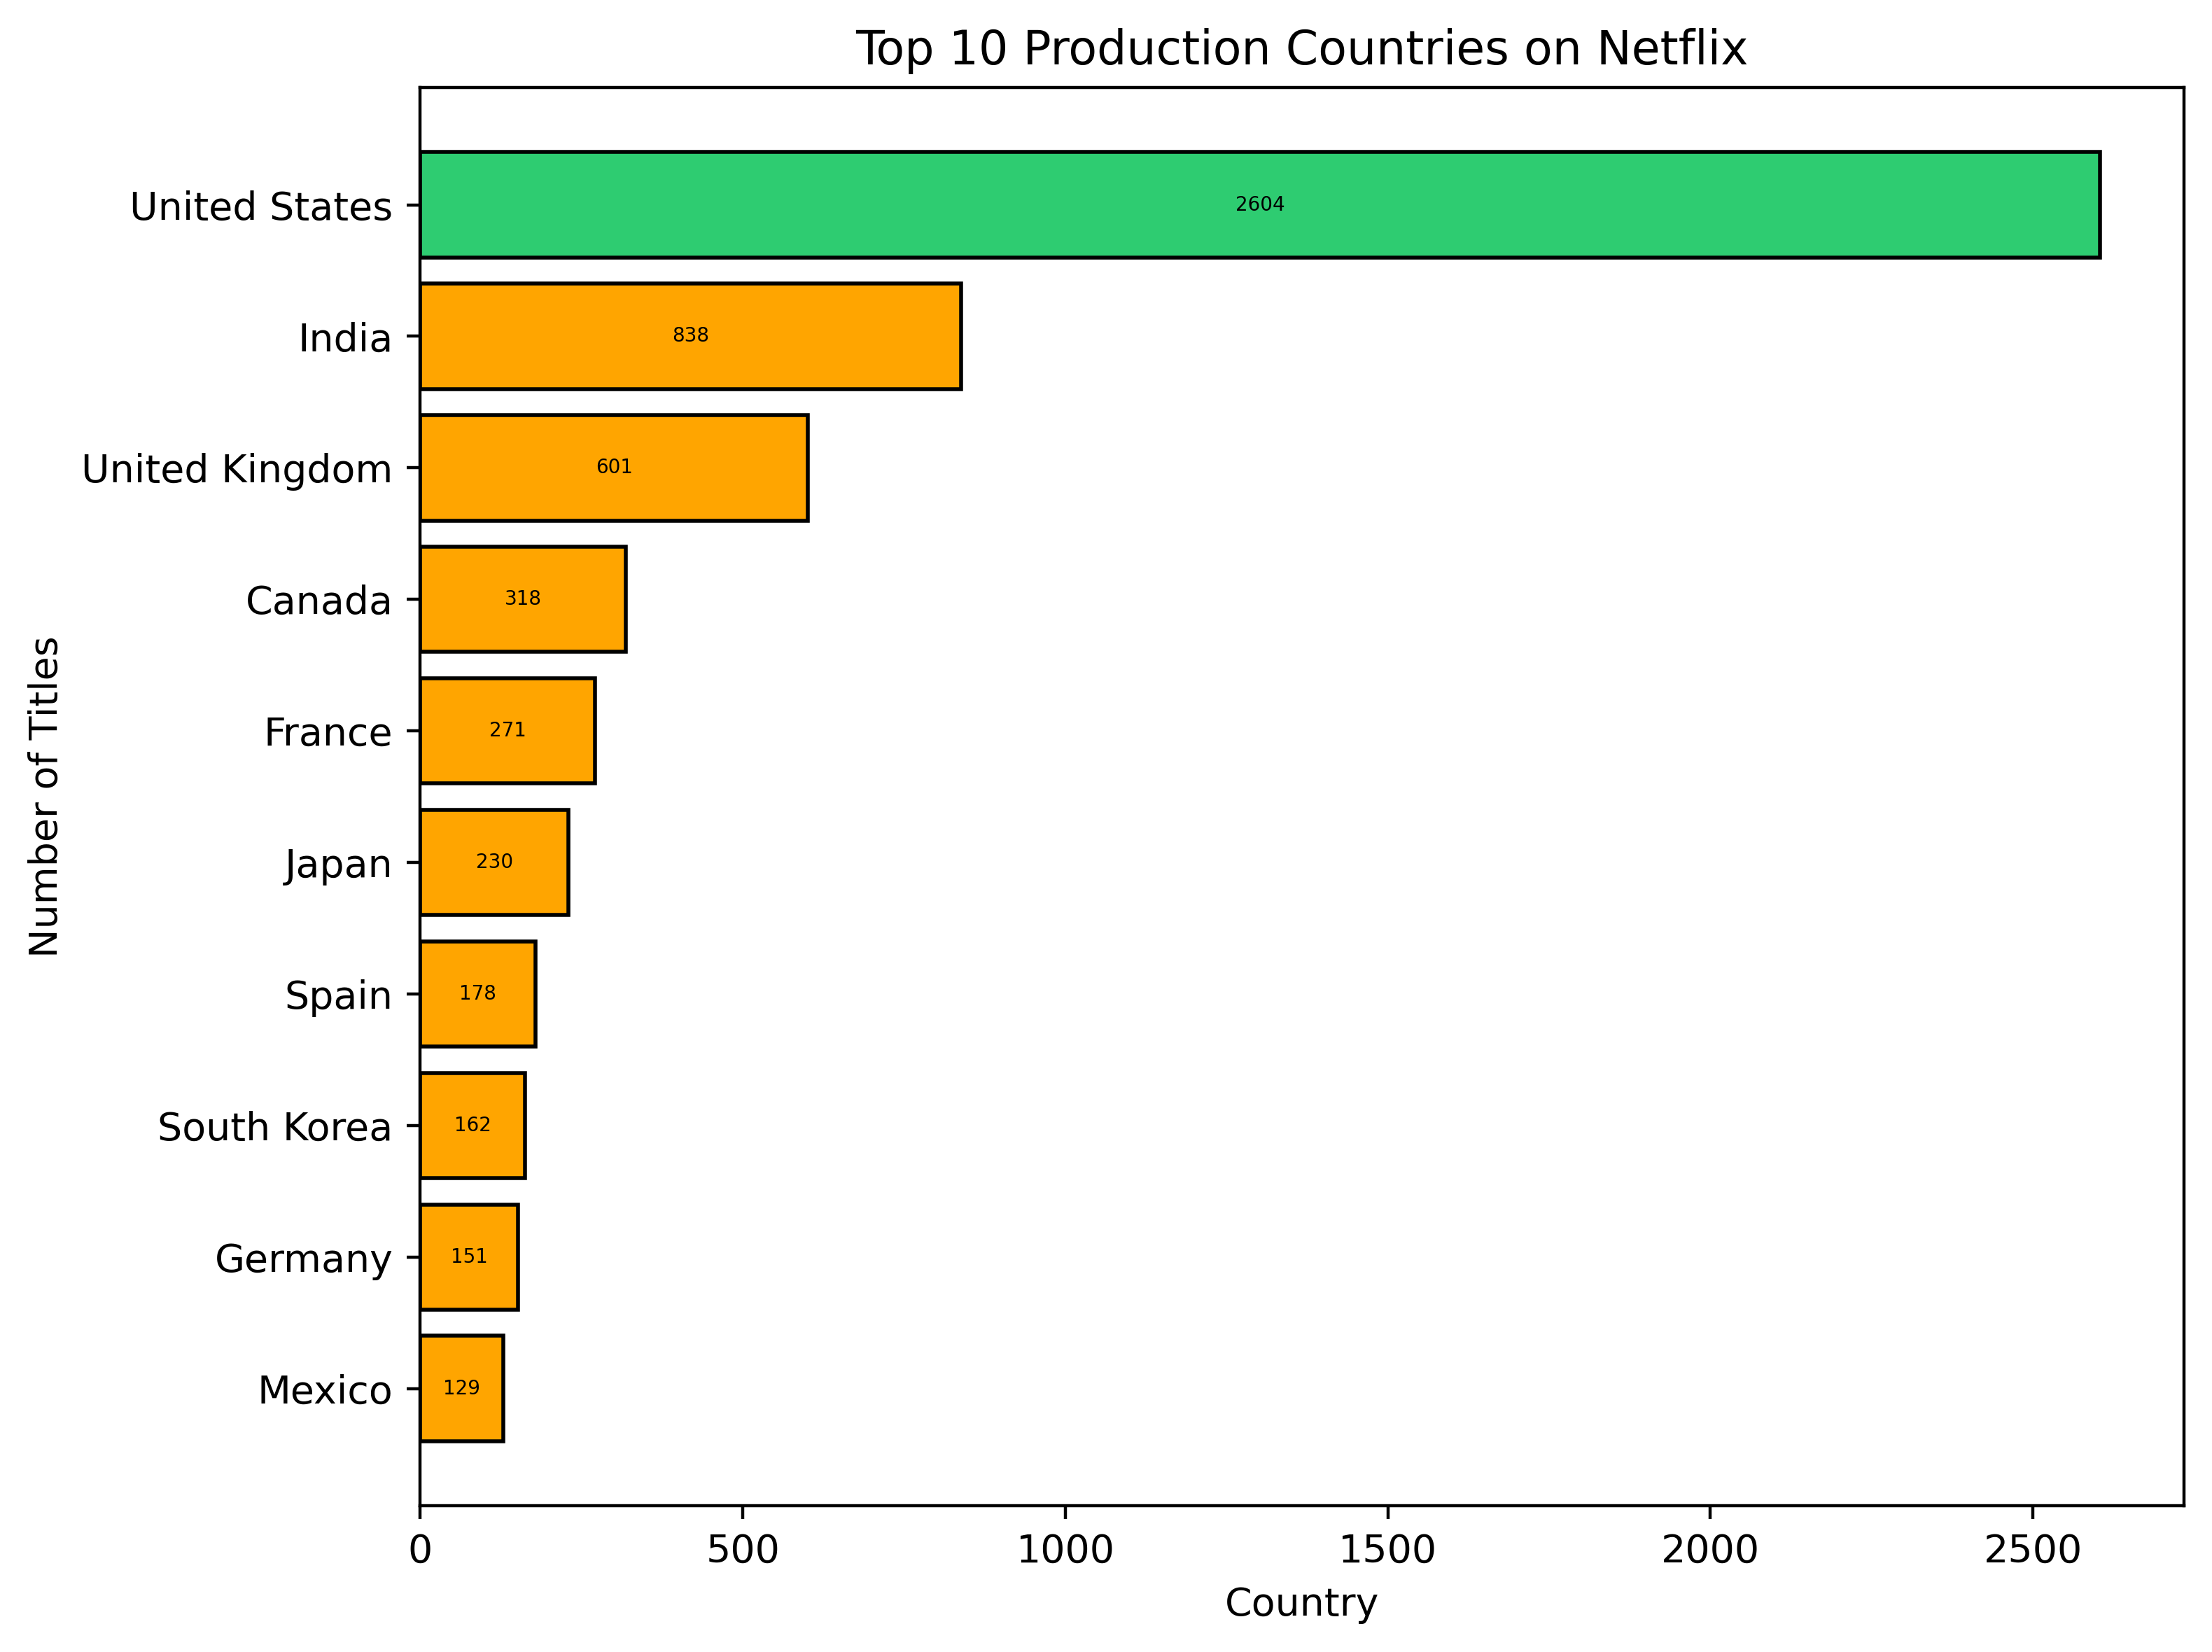

In [1586]:
x = [val[0] for val in country_count]
y = [val[1] for val in country_count]
title = "Top 10 Production Countries on Netflix"
xlabel = "Country"
ylabel = "Number of Titles"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=400)
plothorizontalbar(ax, x, y, color="orange", title=title, xlabel=xlabel, ylabel=ylabel)
plt.tight_layout()
plt.show()

Summary - Top Production Countries on Netflix

-> The United States produces the most Netflix content with 2604 titles.
-> India is second with 838 titles, followed by the United Kingdom with 601 titles.
-> Other major contributors include Canada, France, and Japan.

Overall, Netflix has a strong mix of global content, but the U.S. clearly leads in production.

# Visualising Average movie duration (or number of seasons for TV shows) by year

#For Movie

In [1587]:
#Extract numerical value from duration columns
def extract_num(x):
    pattern = r'\d+'
    return (re.findall(pattern, x)[0])

In [1588]:
netflix_df['duration'] = netflix_df['duration'].apply(lambda x : extract_num(x))

In [1589]:
netflix_df['duration'] = netflix_df['duration'].astype('int')
netflix_df['duration'].dtypes
grouped_type = netflix_df[['type', 'release_year', 'duration']].groupby(by = ['type', 'release_year'])

In [1590]:
def plotlinegraph(ax, x:list=None, y:list=None, color:str='blue', marker:str=None, title:str=None, xlabel:str=None, ylabel:str=None, label:str=""):
    ax.plot(x,y, color=color, marker=marker, label=label)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(visible = True, alpha=1.0)

    if label:
        ax.legend()

In [1591]:
avg_duration = grouped_type['duration'].mean()

In [1592]:
y = avg_duration['Movie']
x = y.index
print(f"Movie released year : \n{x.values} \n\nAverage Duration of movie by released year in Minutes : \n{y}")

Movie released year : 
[1942 1943 1944 1945 1946 1947 1954 1955 1956 1958 1959 1960 1962 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020] 

Average Duration of movie by released year in Minutes : 
release_year
1942     35.000000
1943     62.666667
1944     52.000000
1945     51.333333
1946     76.000000
           ...    
2016     95.571429
2017     95.208524
2018     97.469697
2019     92.877143
2020    100.000000
Name: duration, Length: 70, dtype: float64


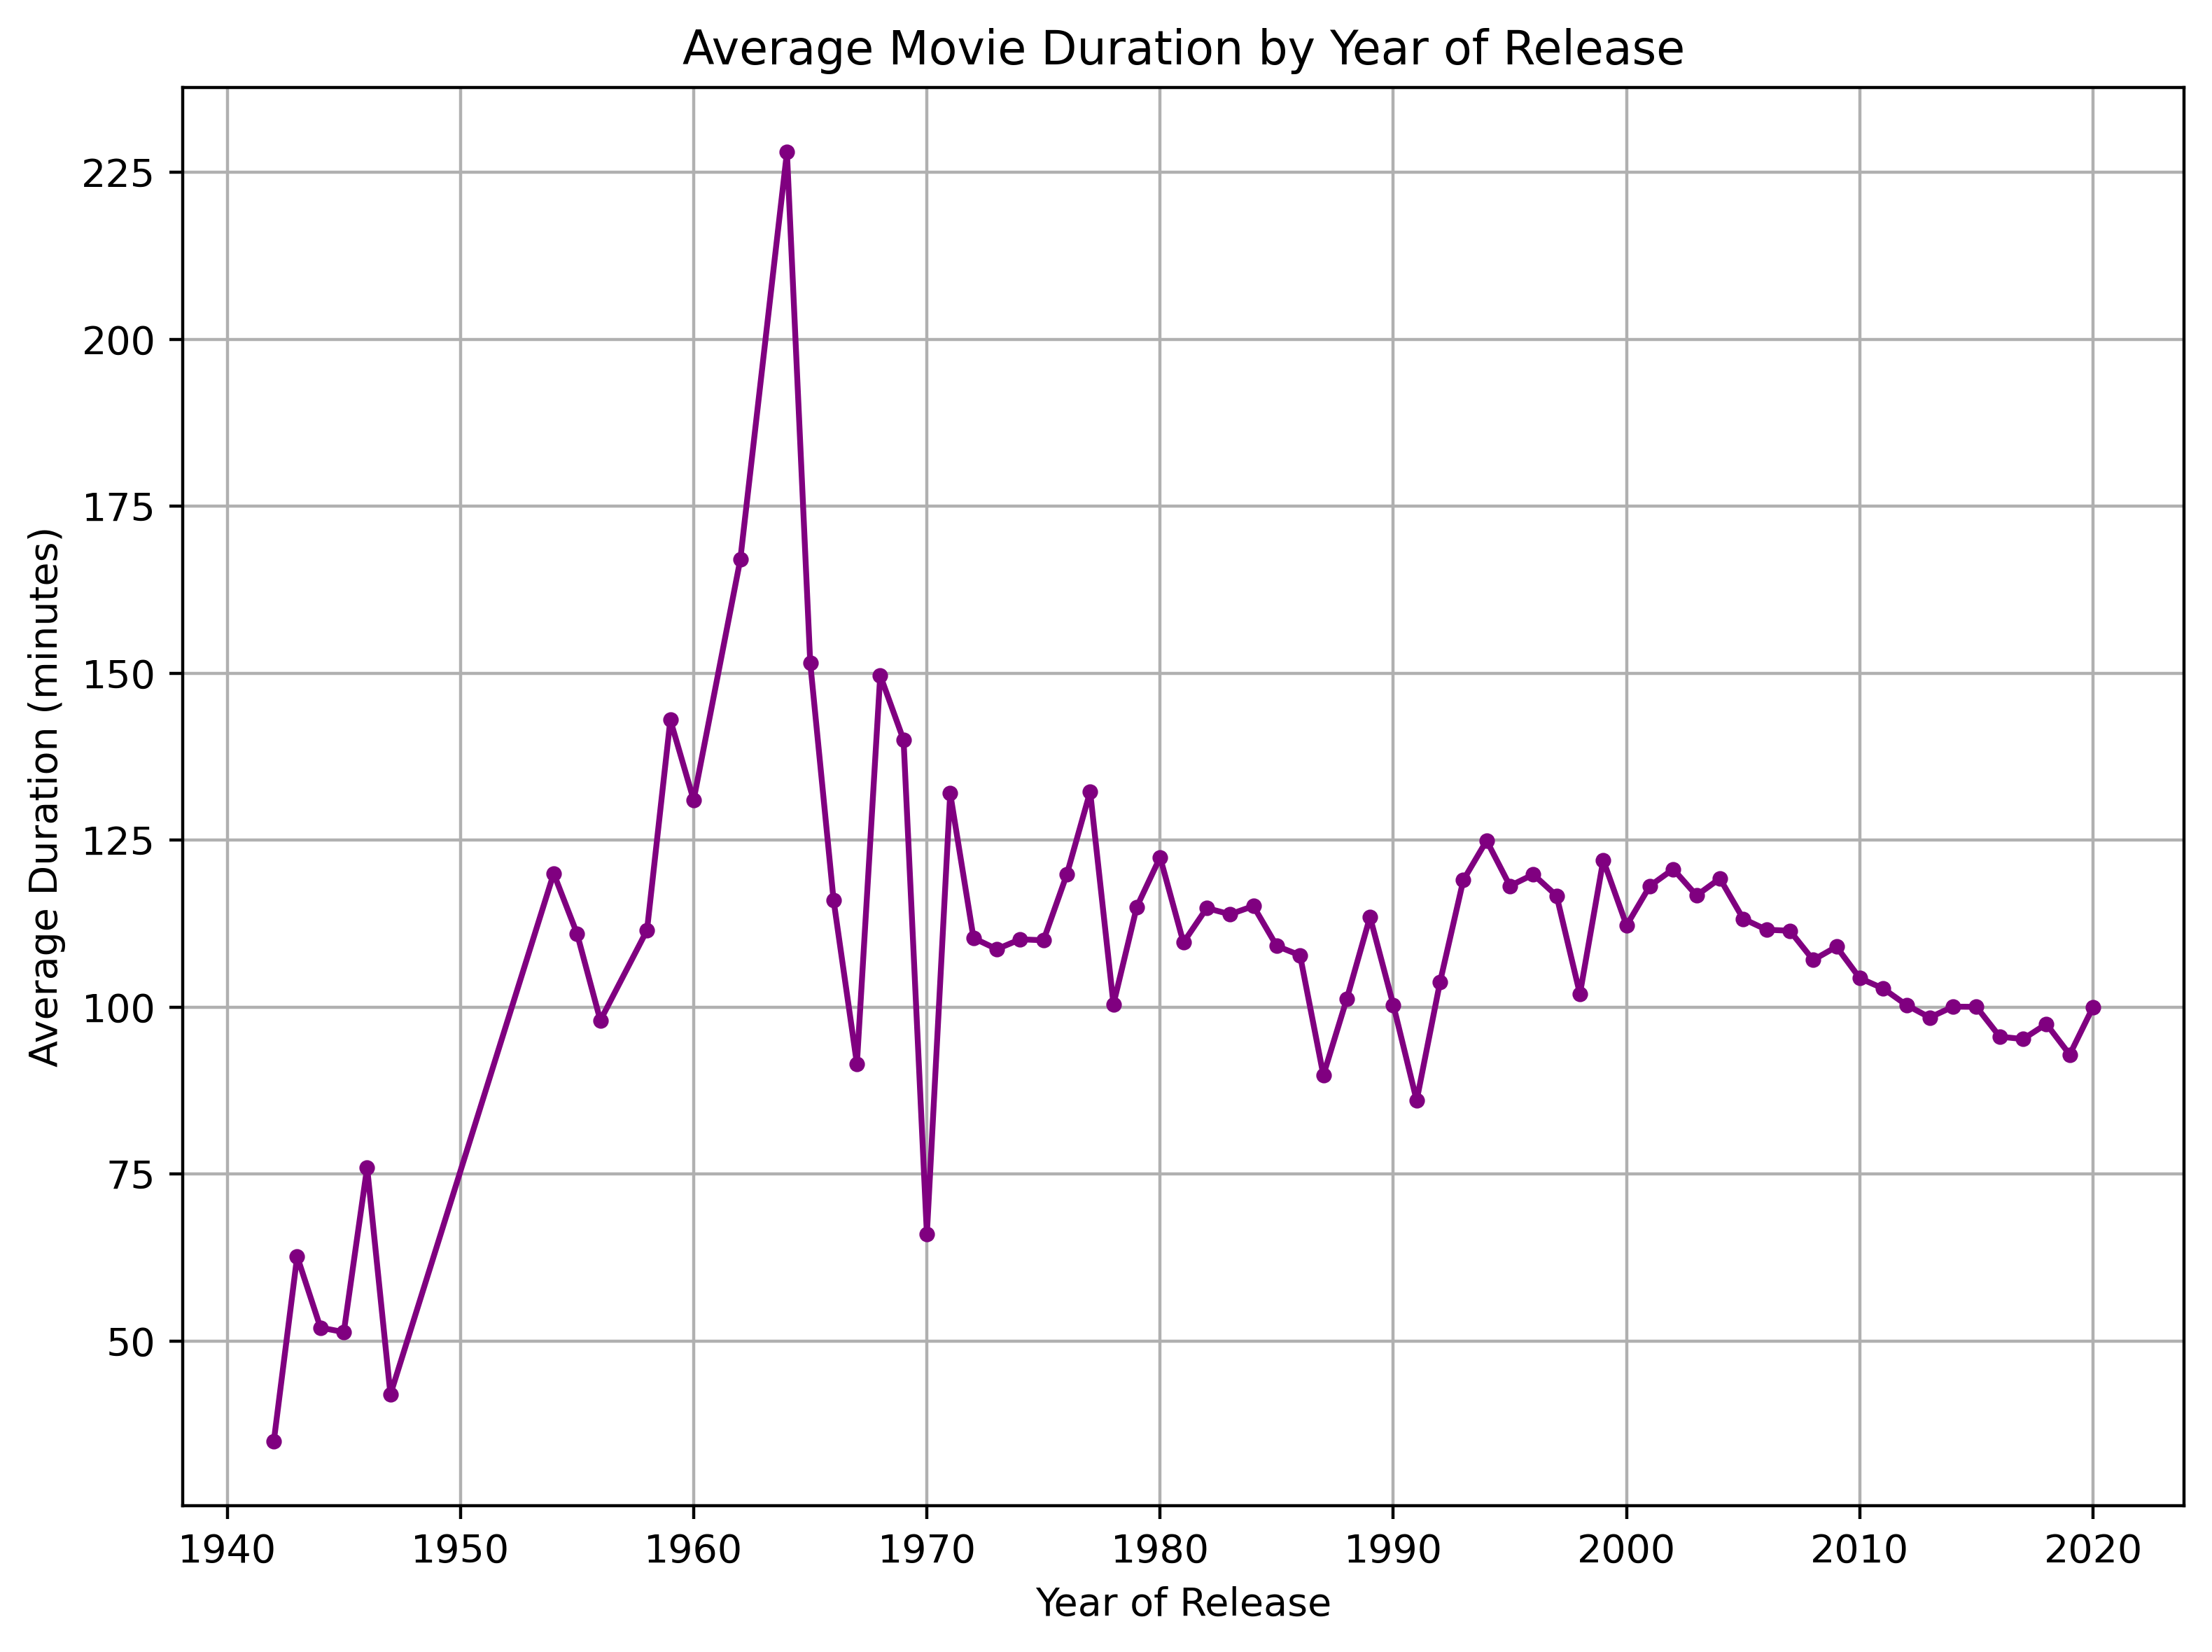

In [1593]:

xlabel = "Year of Release"
ylabel = "Average Duration (minutes)"
title = "Average Movie Duration by Year of Release"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=400)
plotlinegraph(ax, x, y, 
              color='purple', 
              marker='.', 
              title=title, 
              xlabel=xlabel, 
              ylabel=ylabel)
plt.tight_layout()

#For TV Shows

In [1594]:
y = avg_duration['TV Show']
x = y.index
print(f"Movie released year : \n{x.values} \n\nAverage Duration of movie by released year in Minutes : \n{y[:15]}")

Movie released year : 
[1946 1963 1967 1968 1972 1974 1977 1979 1981 1985 1986 1988 1989 1990
 1992 1993 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020] 

Average Duration of movie by released year in Minutes : 
release_year
1946     1.000000
1963     4.000000
1967     8.000000
1968     3.000000
1972     1.000000
1974     4.000000
1977    10.000000
1979     1.000000
1981     1.000000
1985     1.000000
1986     2.000000
1988     3.000000
1989     1.000000
1990     2.666667
1992    10.500000
Name: duration, dtype: float64


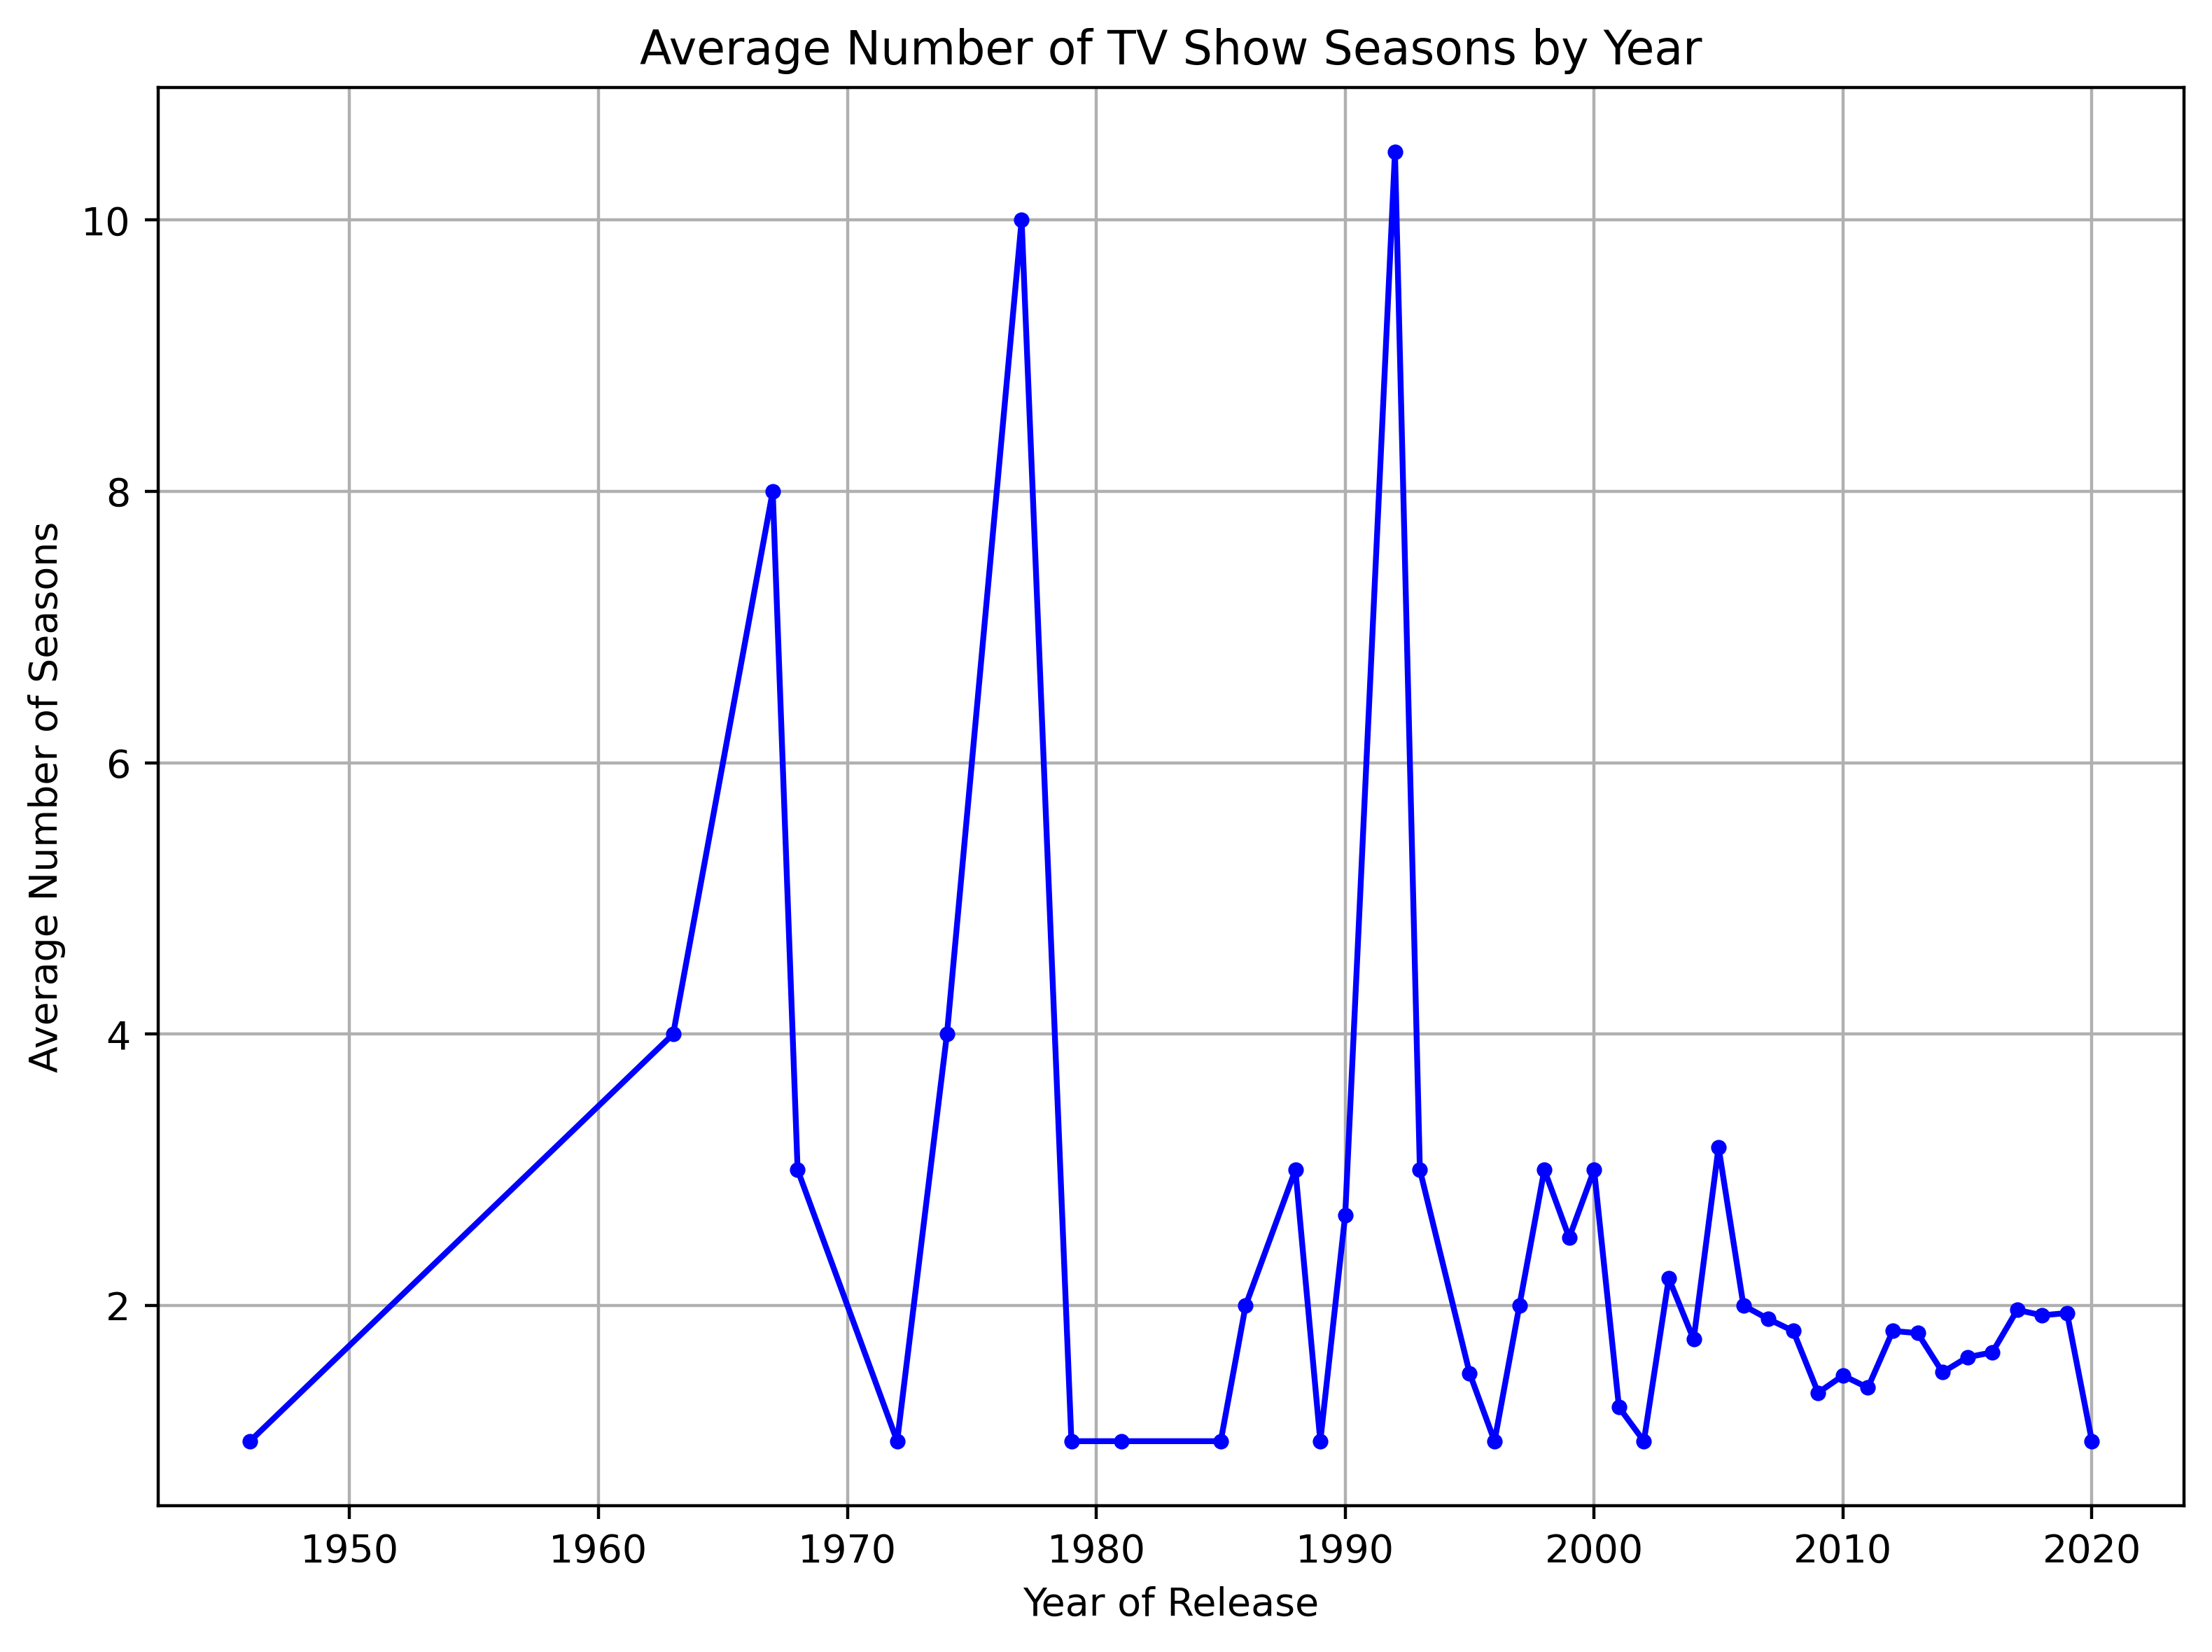

In [1595]:
title = "Average Number of TV Show Seasons by Year"
xlabel = "Year of Release"
ylabel = "Average Number of Seasons"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=400)
plotlinegraph(ax, x, y,
              color = 'blue', 
              marker = '.', 
              title=title, 
              xlabel=xlabel, 
              ylabel=ylabel)
plt.tight_layout()


Summary - Netflix Movie & TV Show Trends 
-> Older movies (before 1970) were much longer, sometimes over 2 hours.
-> Over time, movie durations became shorter, averaging around 100 minutes in recent years.

-> For TV shows, the number of seasons was higher in older shows, but modern Netflix series usually have 1–2 seasons.

This shows that today’s Netflix content focuses on shorter movies and limited-series TV shows.

# Are movies or TV shows becoming more frequent over time (year‐wise)?

In [1596]:
grouped_showtype = netflix_df[['type', 'release_year']].groupby(by = 'type').value_counts().sort_index()

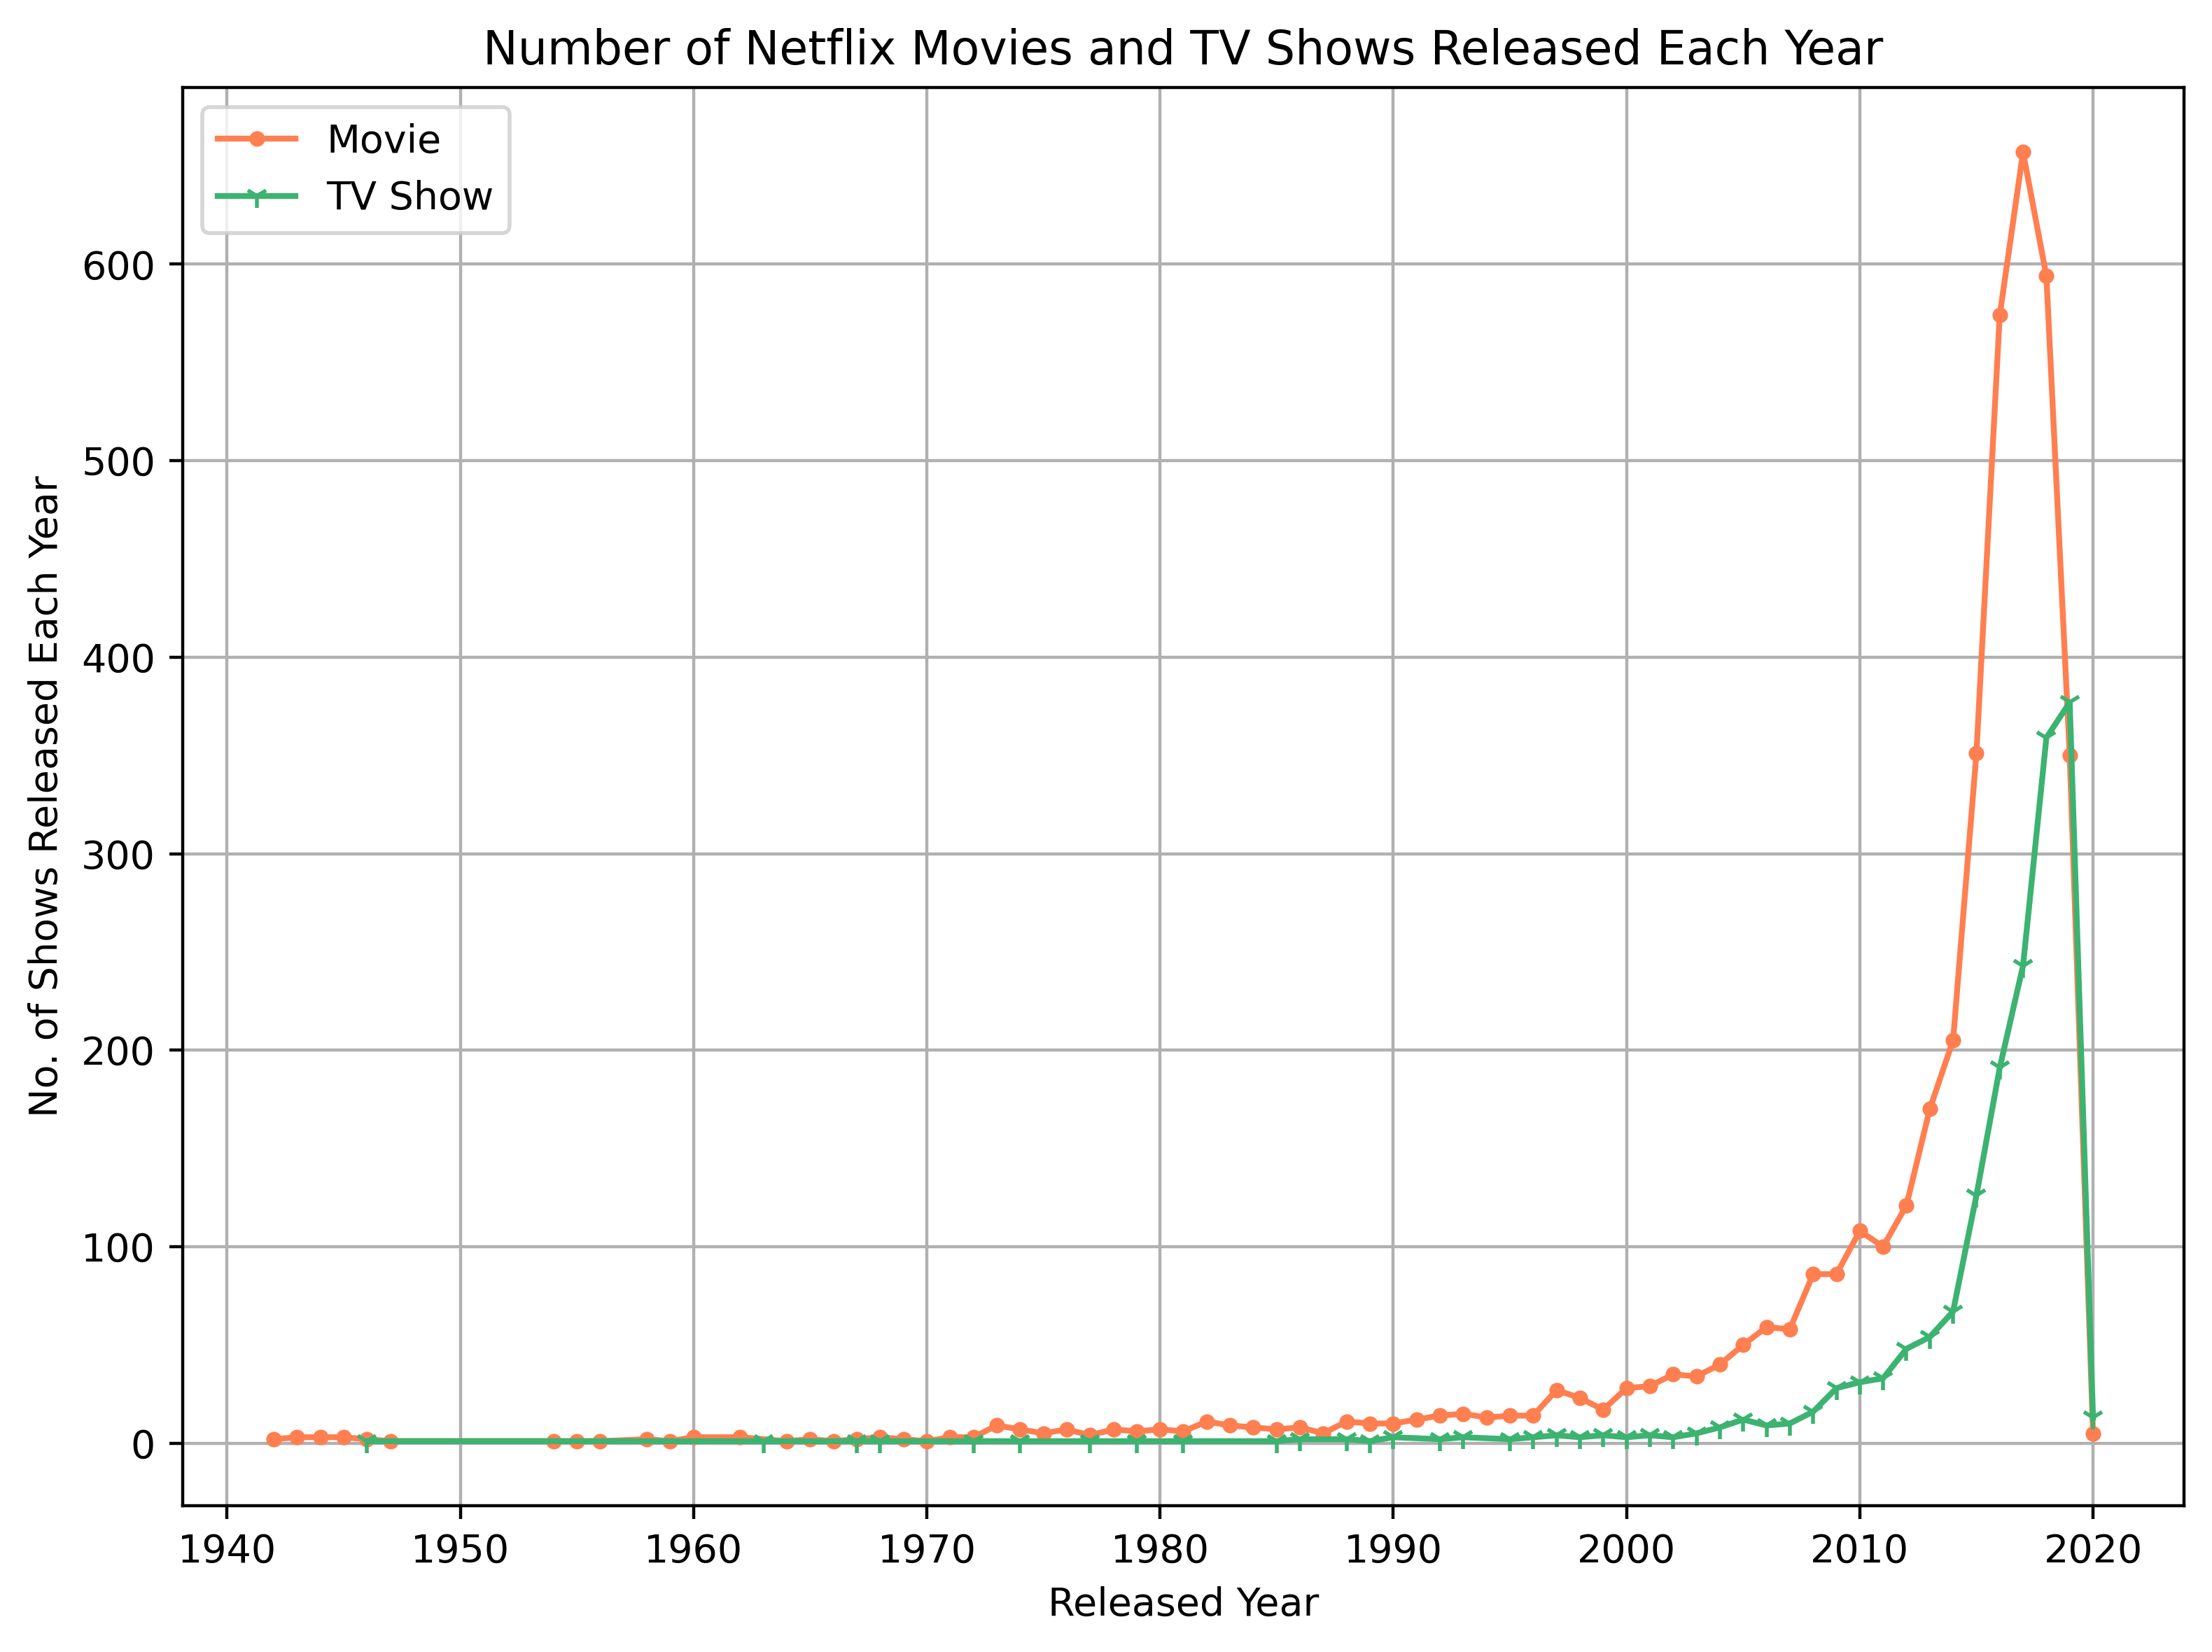

In [1597]:
year = grouped_showtype['Movie'].index 
movie_count = grouped_showtype['Movie']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=400)
plotlinegraph(ax, year, movie_count, 
              color='coral', 
              marker='.',
              label="Movie")

year = grouped_showtype['TV Show'].index 
tv_show_count = grouped_showtype['TV Show']

plotlinegraph(ax, year, tv_show_count, 
              color='mediumseagreen', 
              marker='1', xlabel="Released Year", 
              ylabel="No. of Shows Released Each Year", 
              title="Number of Netflix Movies and TV Shows Released Each Year", label="TV Show")
plt.tight_layout()
plt.show()

Summary - Netflix Releases Movies and TV Shows Over the Years

-> Netflix started with very few releases before 2000.
-> After 2010, the number of movies and TV shows grew rapidly.
-> The highest number of releases happened around 2019–2020, showing Netflix’s major expansion during that time.

Movies have always been released more than TV shows, but both have seen big growth in recent years.

# Analysing and Visualise the top 10 Genres listed on Netflix

In [1598]:
genre_list= [genre.strip() for row in netflix_df['genre'].dropna() for genre in row.split(',')]
genre_count = Counter(genre_list).most_common(10)
print("Top 10 genres listed in Netflix:")
for genre, count in genre_count:  
    print(f"{genre} - {count}")

Top 10 genres listed in Netflix:
International Movies - 1859
Dramas - 1590
Comedies - 1077
International TV Shows - 818
Documentaries - 615
Action & Adventure - 592
Independent Movies - 549
TV Dramas - 493
Thrillers - 385
TV Comedies - 377


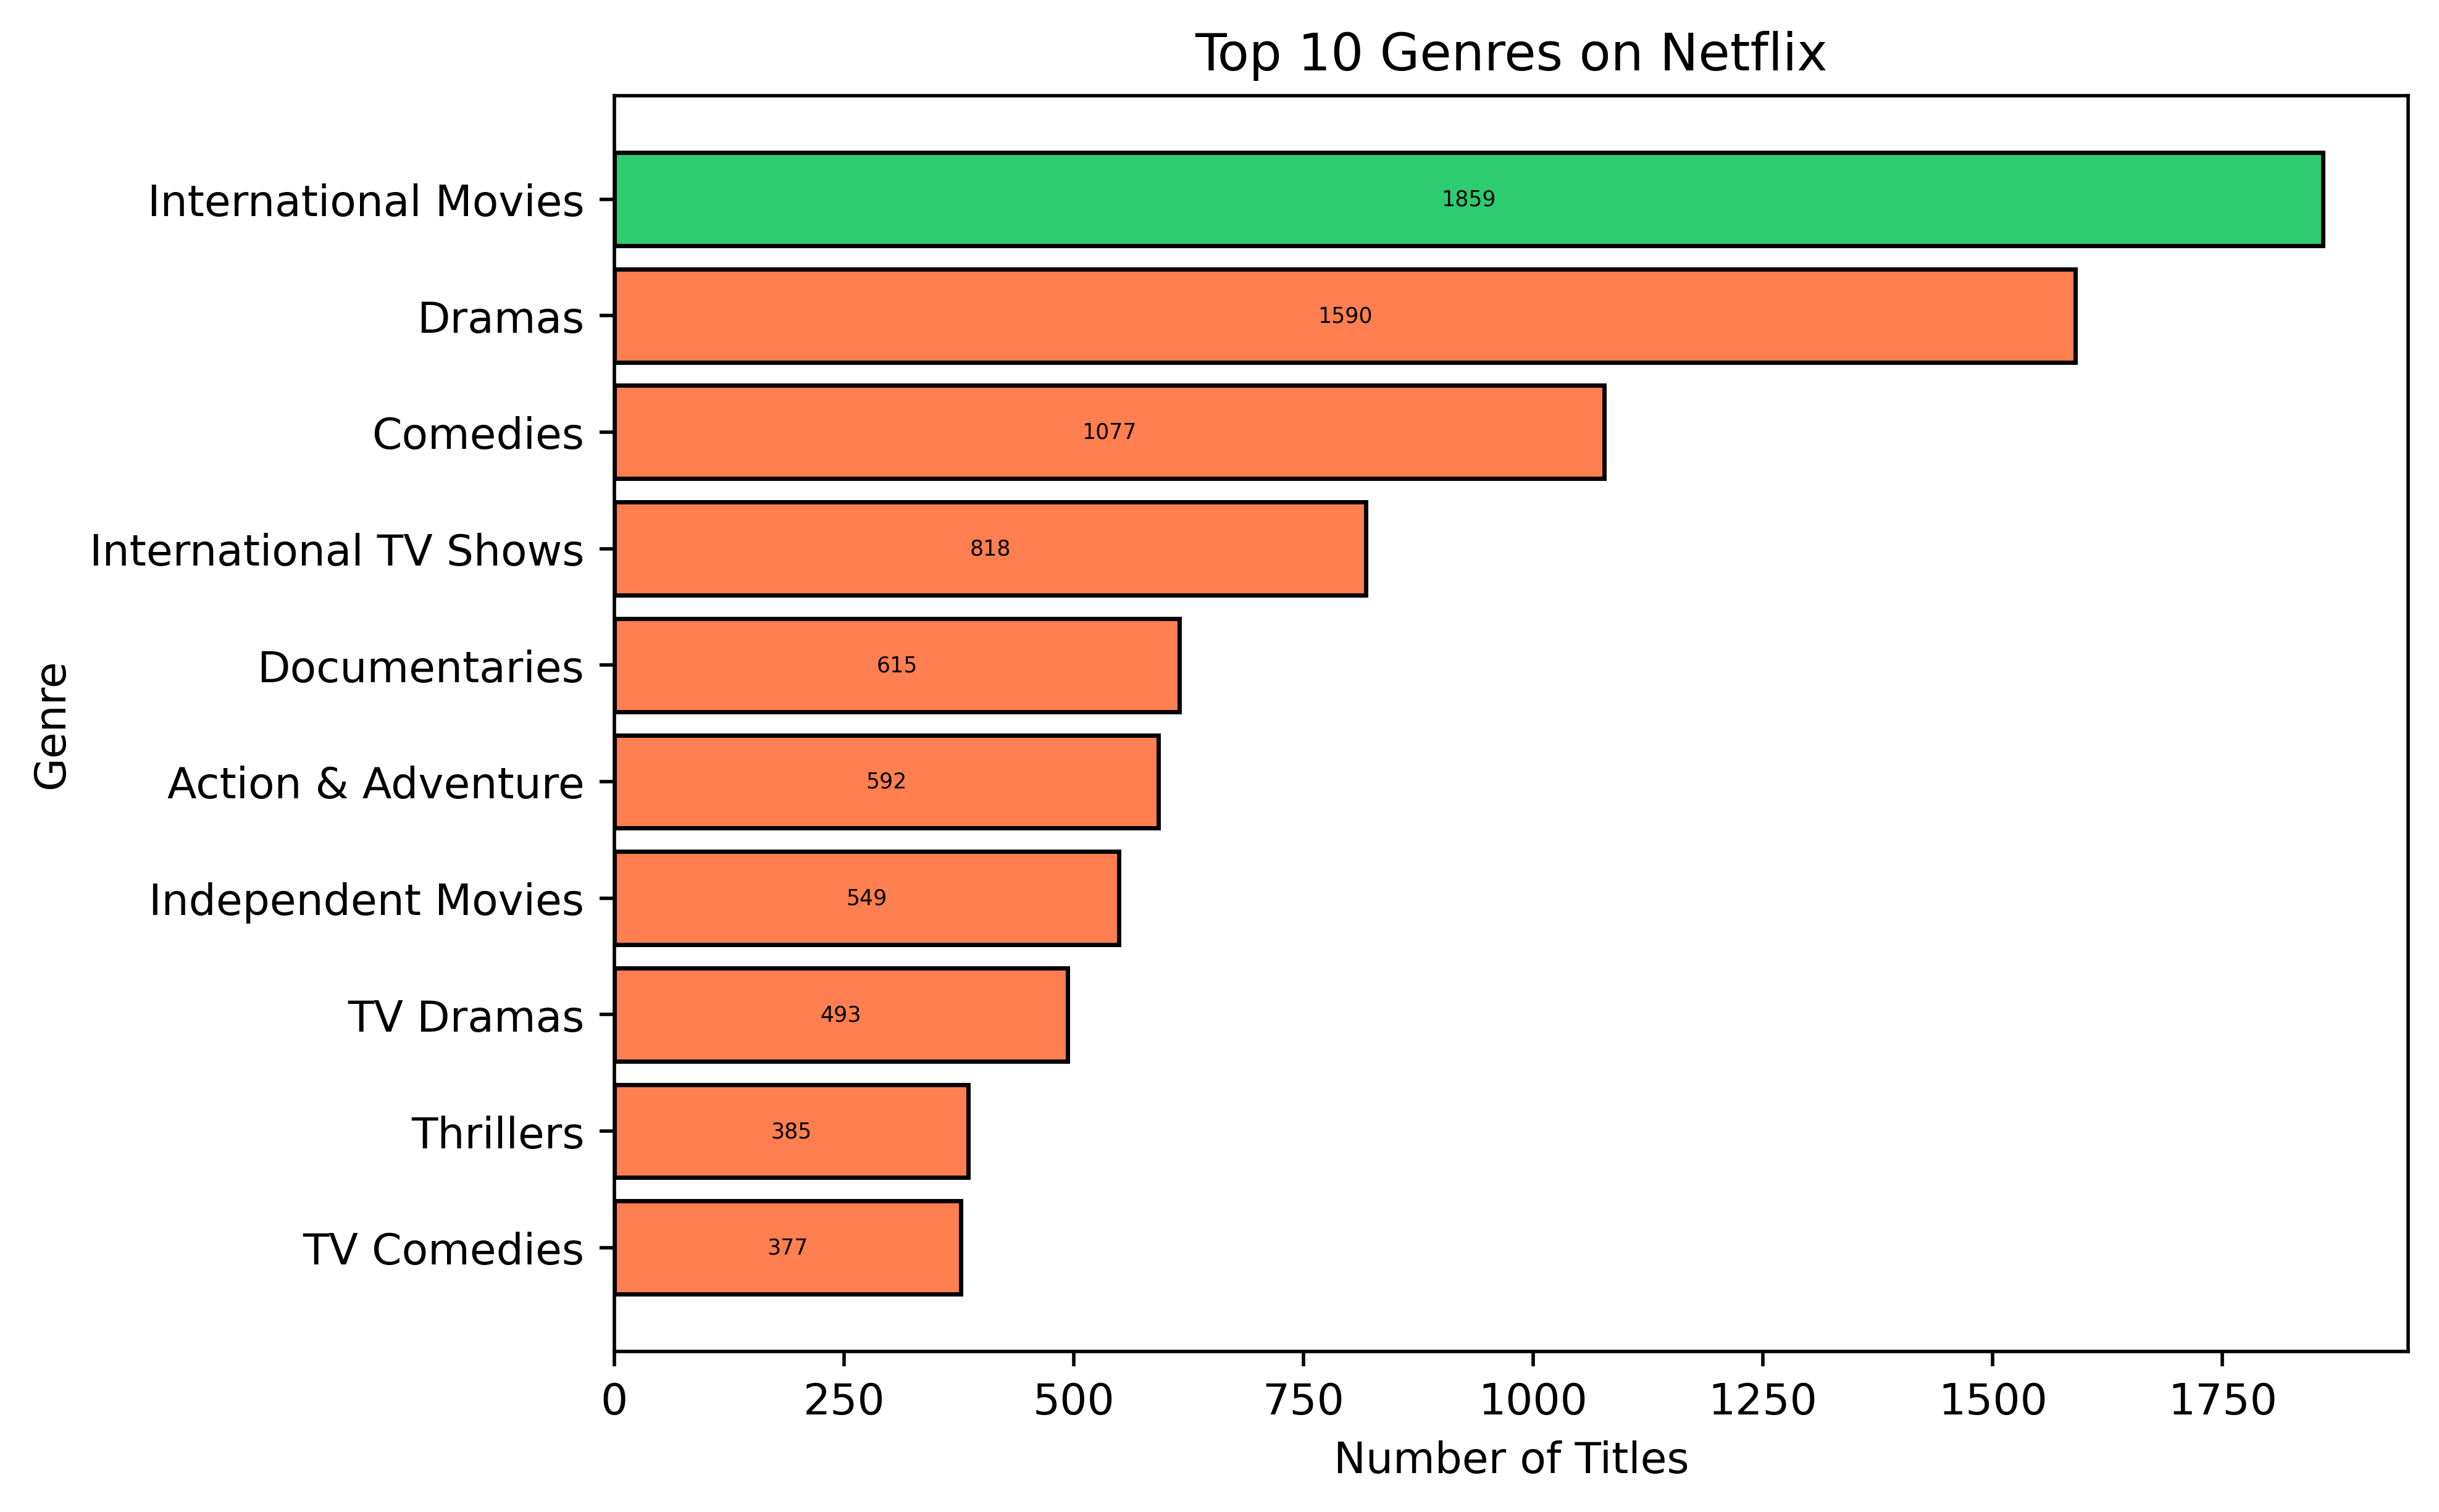

In [1599]:
x = []
y = []
for genre in genre_count:
    x.append(genre[0])
    y.append(genre[1])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5), dpi=500)
plothorizontalbar(ax, x, y, color='coral',
                  title="Top 10 Genres on Netflix",
                  xlabel="Number of Titles",
                  ylabel="Genre")
plt.tight_layout()
plt.show()

Summary - Top Genres on Netflix by Country

-> The most common genre on Netflix is International Movies with 1859 titles, followed by Dramas with 1590 titles.
-> Comedies are also very popular, with over 1000 titles.
-> Other genres like International TV Shows, Documentaries, and Action & Adventure have a decent number of titles too.
-> Genres such as Thrillers and TV Comedies appear less often.

Overall, Netflix mainly focuses on movies, especially international films, dramas, and comedies.

# Visualise the most common genres for a country India

In [1600]:
netflix_df[['country', 'genre']]
india_genre = netflix_df[['genre']].loc[netflix_df['country'].str.contains("India")]
india_genrelist = [genre.strip() for genres in india_genre['genre'].dropna() for genre in genres.split(',')]
indiagenre_count = Counter(india_genrelist).most_common(10)
print(f"List of Genre listed in Netflix prefer by Indian :\n")
genres, genrecount = [], []
for genre in indiagenre_count:
    print(f'{genre[0]} - {genre[1]}')
    genrecount.append(genre[1])
    genres.append(genre[0])


List of Genre listed in Netflix prefer by Indian :

International Movies - 719
Dramas - 539
Comedies - 246
Independent Movies - 128
Action & Adventure - 126
Music & Musicals - 92
Romantic Movies - 91
Thrillers - 72
International TV Shows - 48
Horror Movies - 31


['International Movies', 'Dramas', 'Comedies', 'Independent Movies', 'Action & Adventure', 'Music & Musicals', 'Romantic Movies', 'Thrillers', 'International TV Shows', 'Horror Movies']


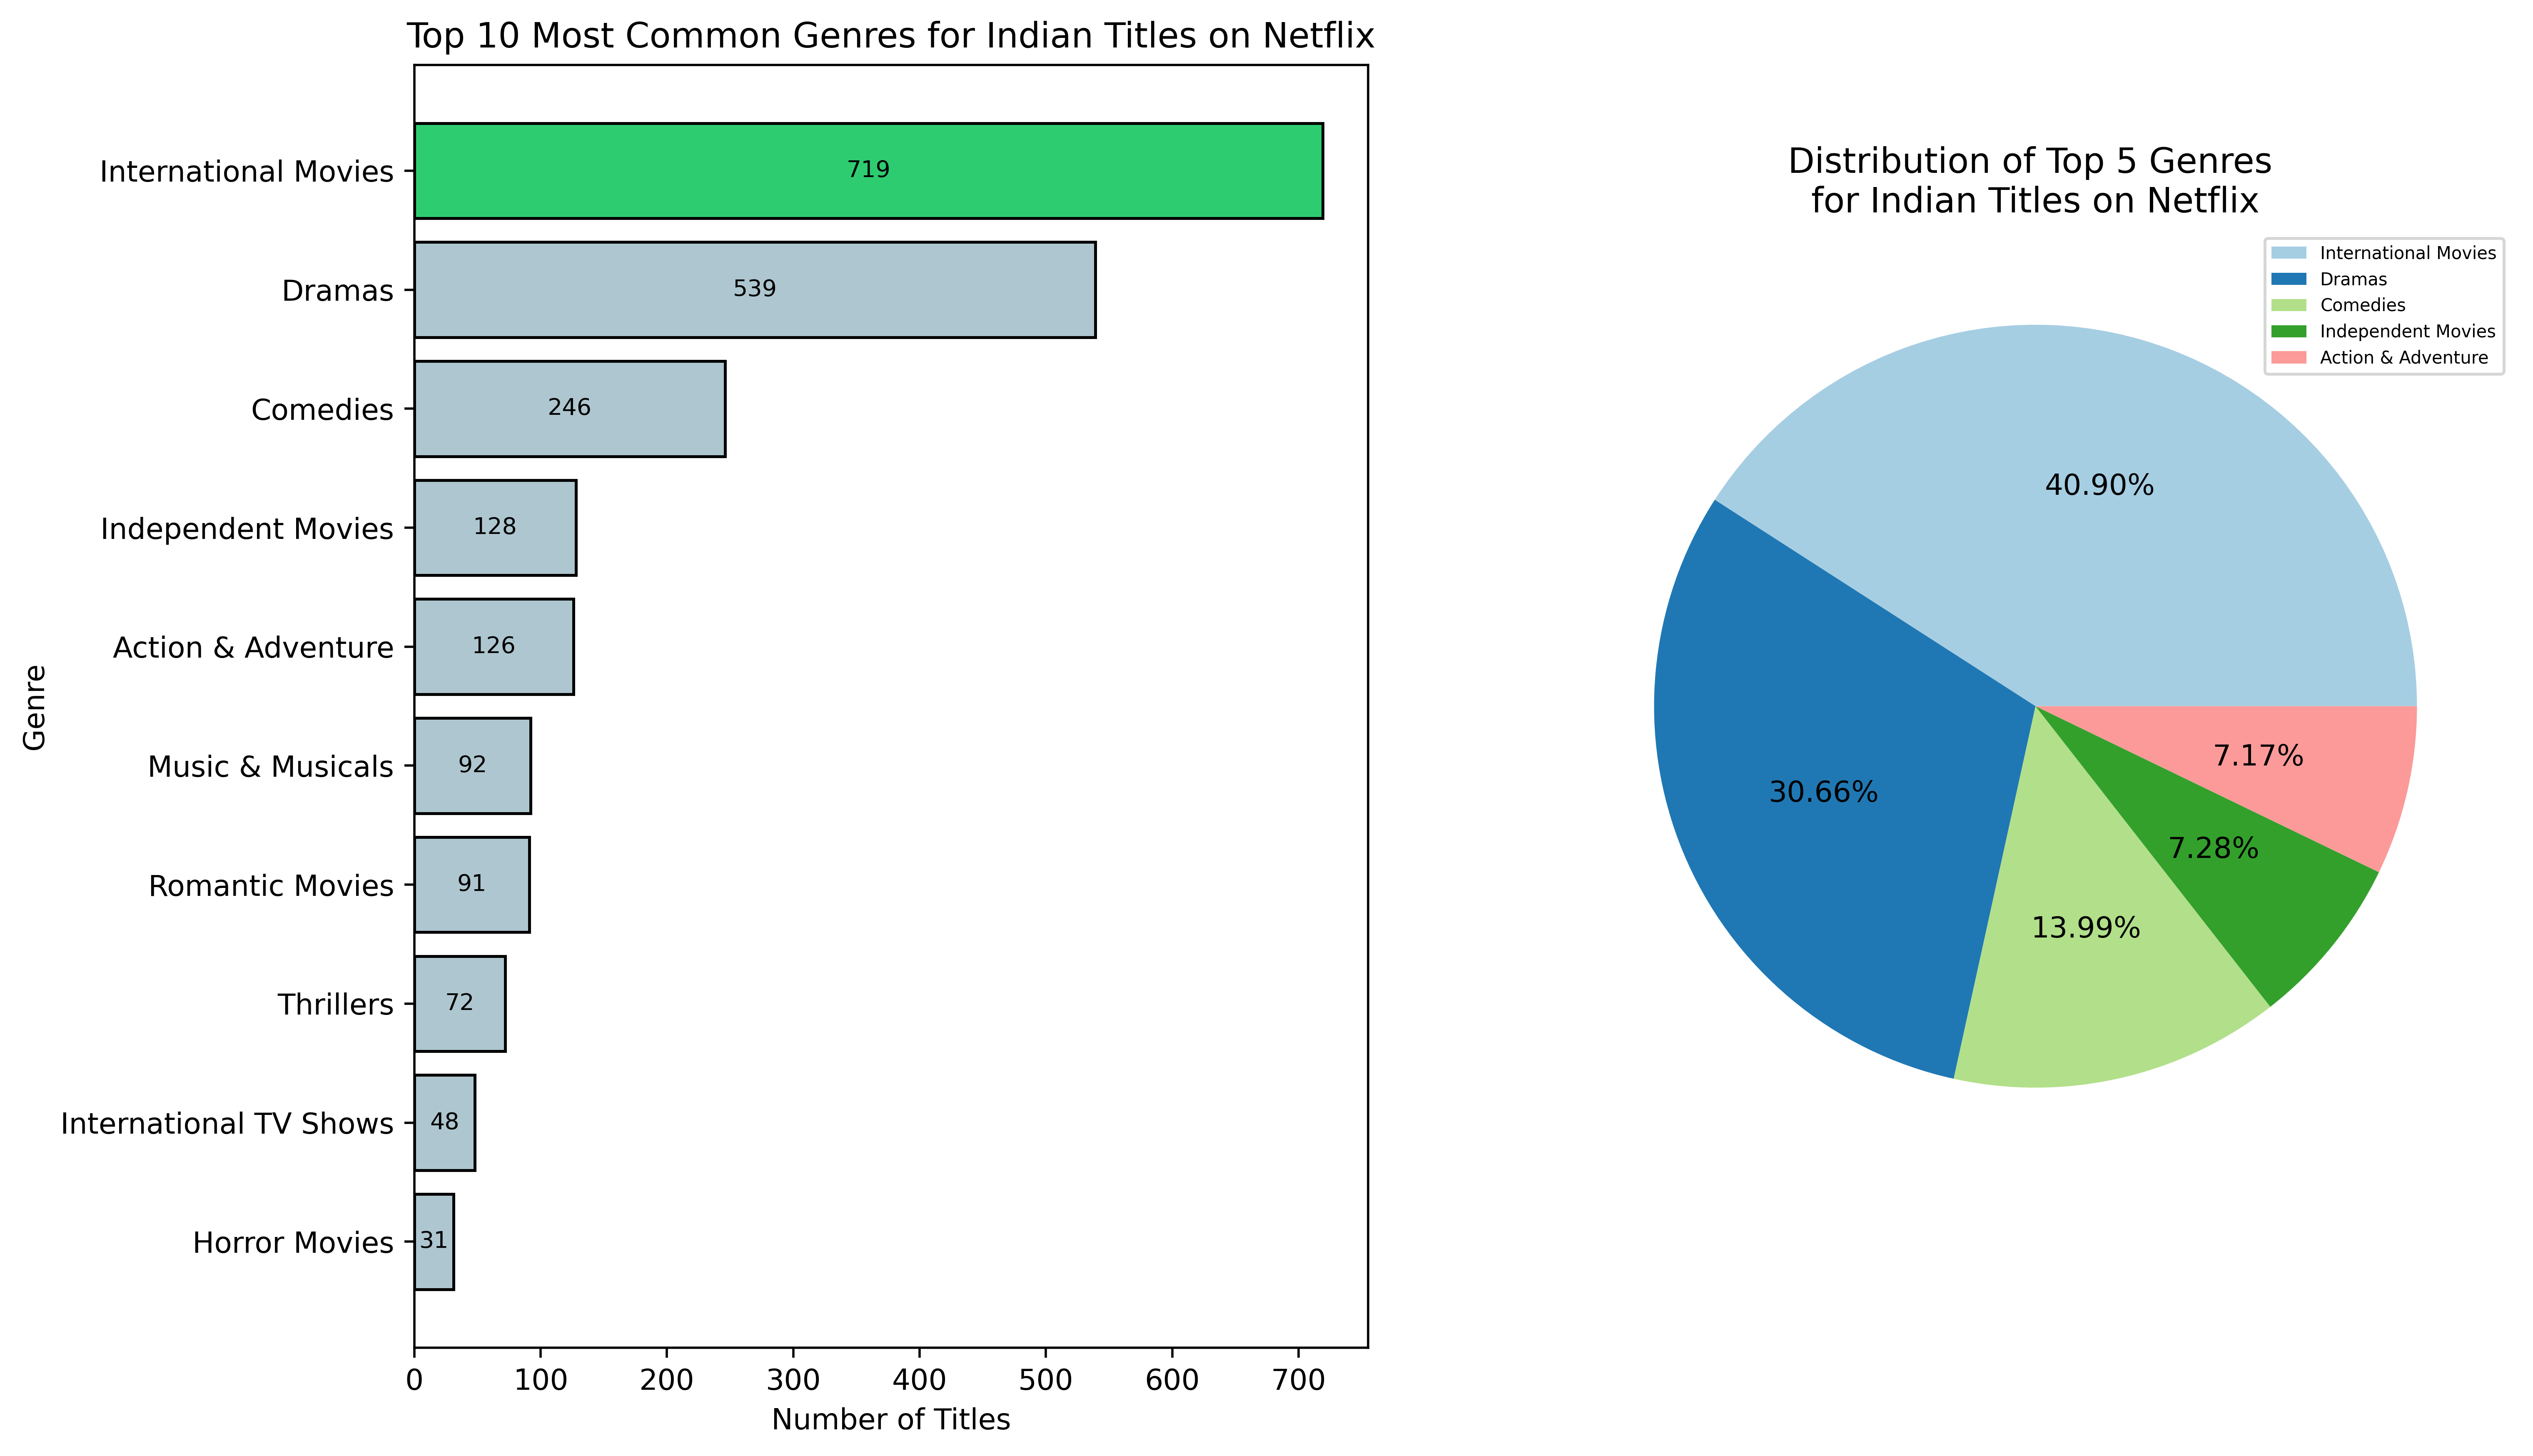

In [1601]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,8), dpi=500)

plothorizontalbar(ax[0], y=genrecount, x=genres, 
                  color='#AEC6CF',
                  title="Top 10 Most Common Genres for Indian Titles on Netflix",
                  xlabel="Number of Titles",
                  ylabel="Genre", label_fontsize=8)
print(genres)
plotpieChart(ax[1], value=genrecount[:5], legend=genres[:5], legendfontSize=6, pie_title="Distribution of Top 5 Genres \nfor Indian Titles on Netflix")

Summary - Netflix Genres in India 

Most of the Netflix content available for India is made up of movies, especially international films and dramas.
-> International Movies are the most common, with 719 titles — about 41% of all Indian Netflix titles.
-> Dramas come next with 539 titles (31%), showing that Indian viewers enjoy story-driven content.
-> Comedies (246 titles) are also popular, giving viewers lighter entertainment options.
-> Independent Movies and Action & Adventure films follow, each with around 125 titles.
-> Other genres like Music & Musicals, Romantic Movies, and Thrillers appear less often, while TV shows and documentaries make up only a small part of the total content.

Overall, Netflix in India mainly focuses on movies, with a smaller selection of TV shows. This shows that most Indian Netflix viewers prefer watching films, especially dramas and international content.

# Top 15 Director that produced the most titles on Netflix.

In [1602]:
director_name = [name.strip() for director in netflix_df['director'].dropna() for name in director.split(',')]
director_count = Counter(director_name).most_common(15)
dir_count, dir_name = [], []
print(f"Top 15 Directors by Number of Titles on Netflix :\n")
for director in director_count:
    print(f'{director[0]} - {director[1]}')
    dir_count.append(director[0])
    dir_name.append(director[1])

Top 15 Directors by Number of Titles on Netflix :

Jan Suter - 21
Raúl Campos - 19
Jay Karas - 14
Jay Chapman - 12
Marcus Raboy - 12
Martin Scorsese - 9
Steven Spielberg - 9
Umesh Mehra - 8
Shannon Hartman - 8
David Dhawan - 8
Johnnie To - 8
Ryan Polito - 7
Quentin Tarantino - 7
S.S. Rajamouli - 7
Noah Baumbach - 7


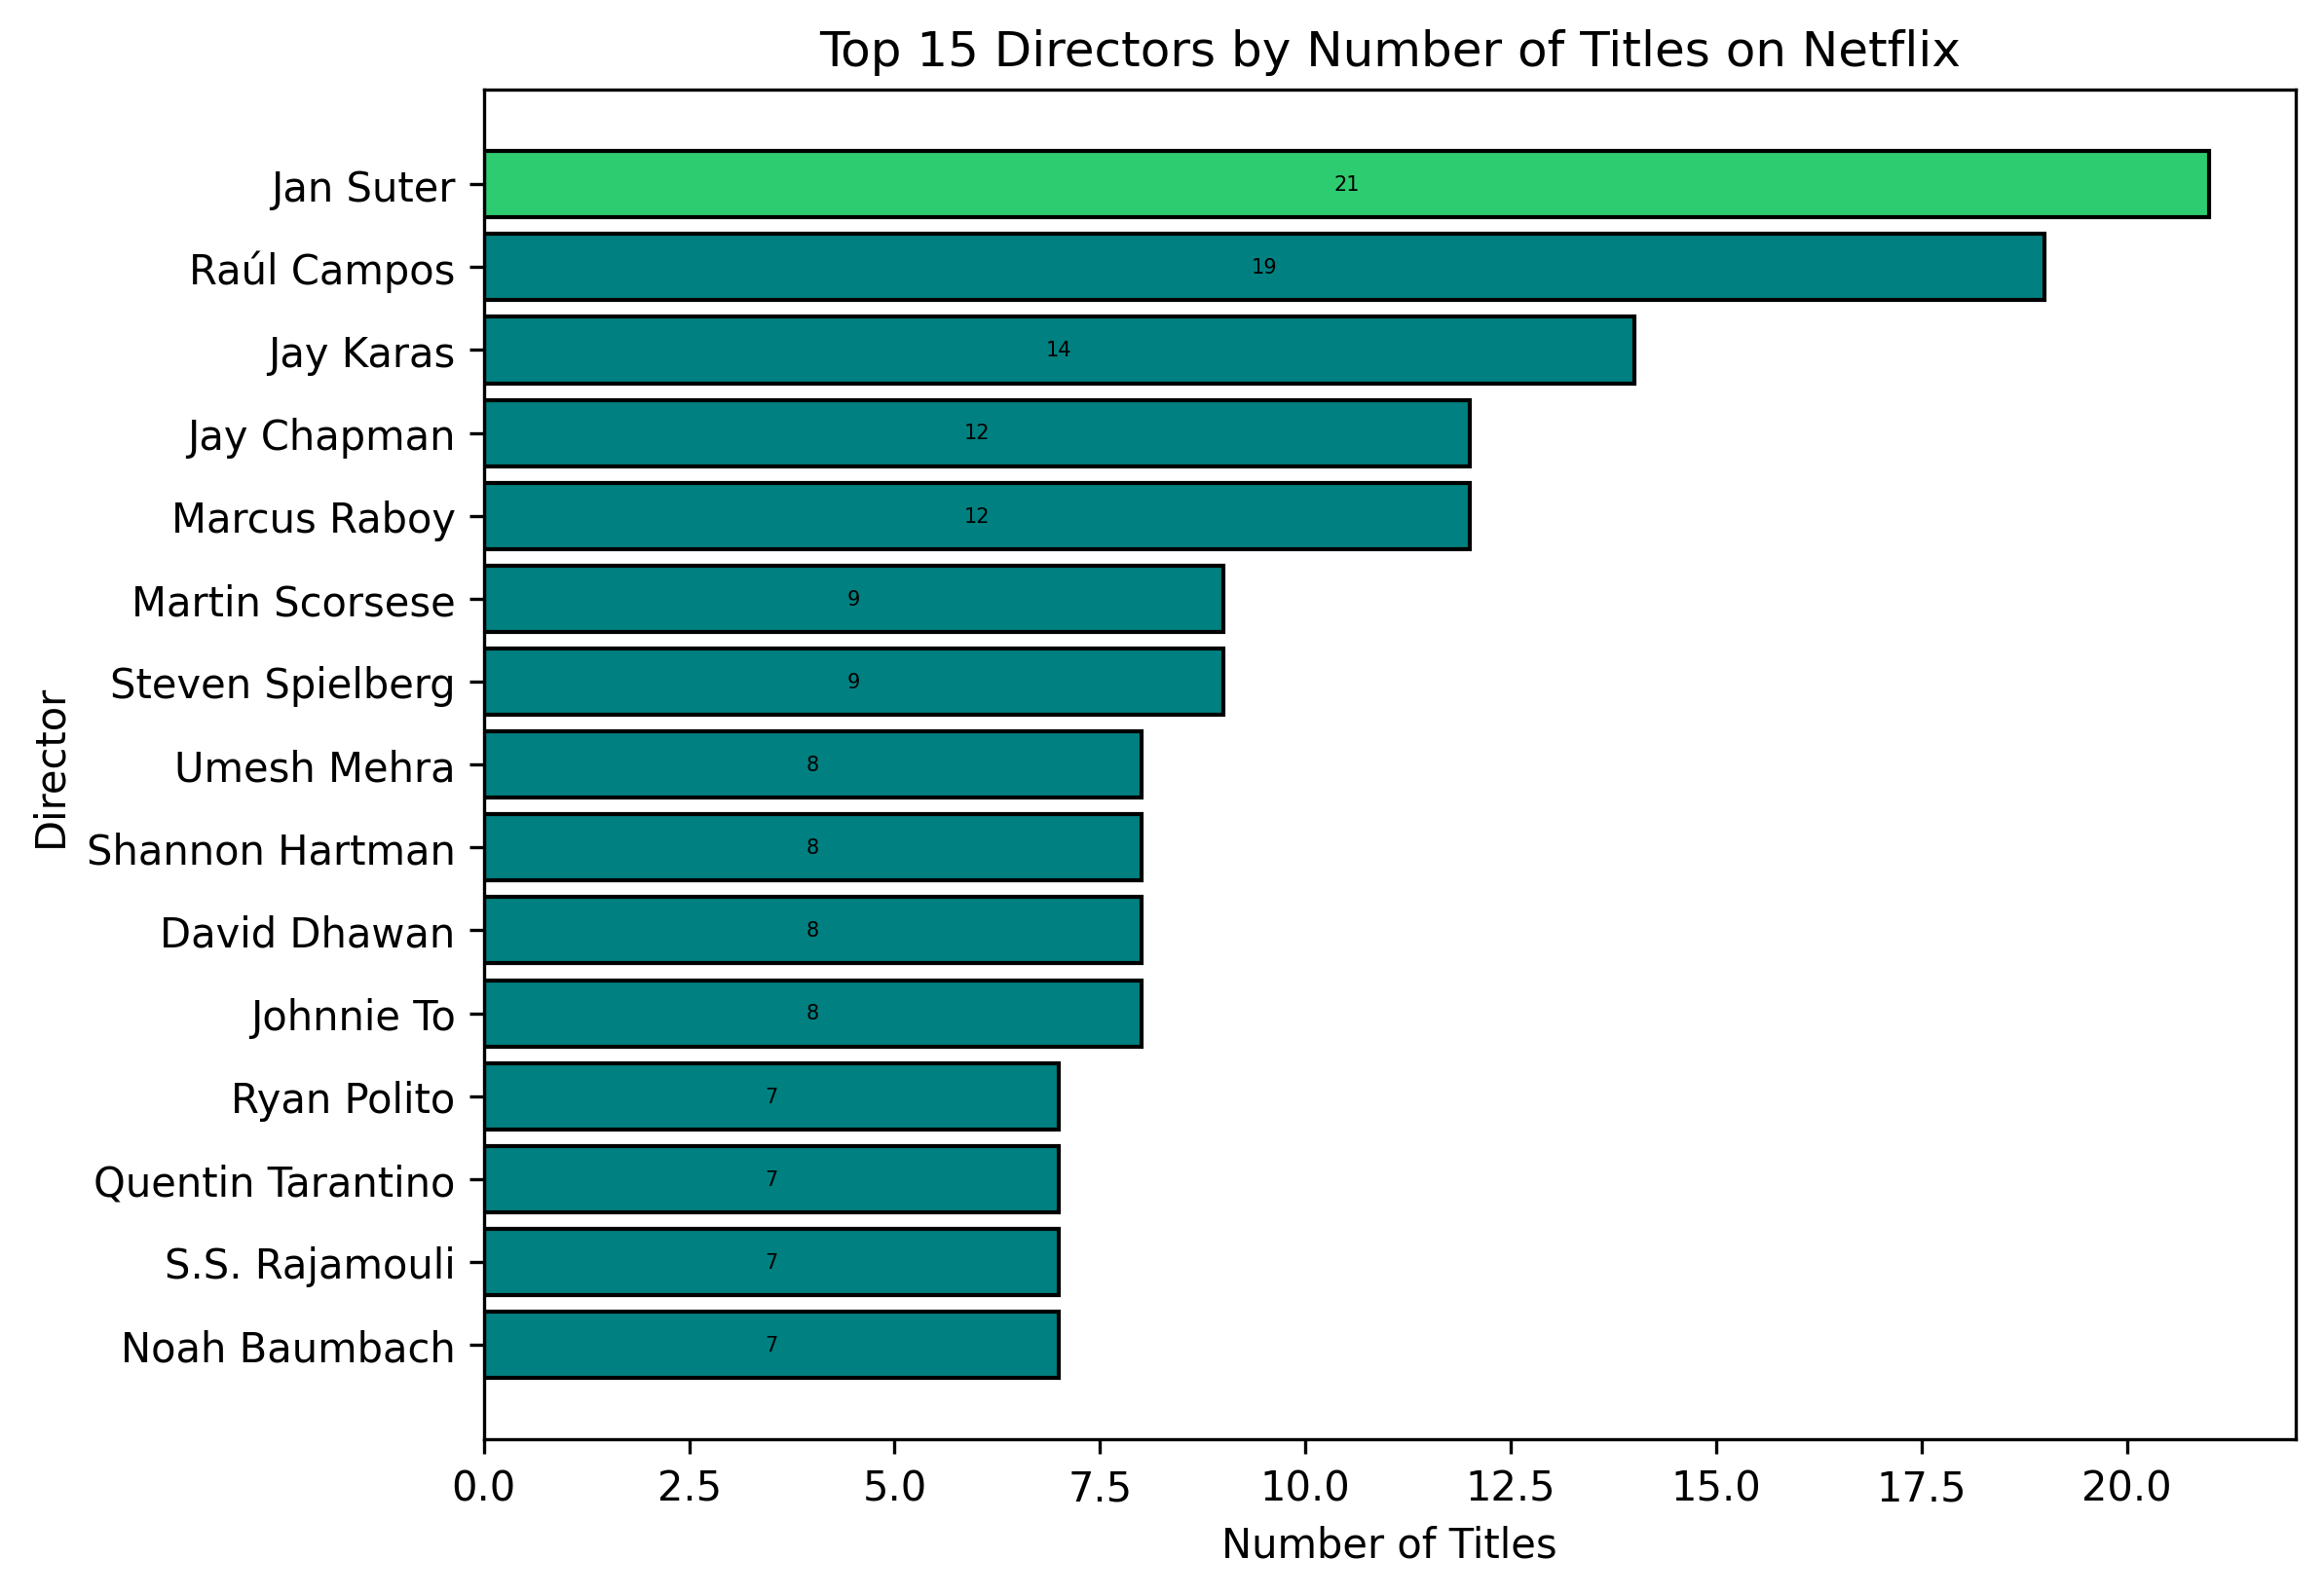

In [1603]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
plothorizontalbar(ax, dir_count, dir_name, 
                  color='teal',
                  title="Top 15 Directors by Number of Titles on Netflix", 
                  xlabel="Number of Titles",
                  ylabel="Director")

Summary - Top 15 Directors on Netflix 

The chart shows the directors with the most titles available on Netflix.
-> Jan Suter leads with 21 titles, followed by Raúl Campos with 19.
-> Jay Karas, Jay Chapman, and Marcus Raboy also have multiple titles, showing their strong presence on the platform.
-> Famous names like Martin Scorsese and Steven Spielberg each have 9 titles, highlighting their continued influence in film.

Overall, the list includes a mix of international and Indian directors, showing Netflix’s wide range of content from around the world.